# Exploration of Air Pollution Data
### Source of the data can be found  [here](https://www.kaggle.com/datasets/mayukh18/deap-deciphering-environmental-air-pollution)

In [166]:
pip install geopandas


     ---------------------------------------- 1.1/1.1 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 1.0 MB/s eta 0:00:00


In [171]:
# importing libraries for data exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import geopandas as gpd
from geopandas import geodataframe
from shapely.geometry import Point

### Loading and Overview

In [120]:
# creating a dataframe from csv file and displaying first ten rows

df = pd.read_csv("pollution_data.csv")

df.head(10)

,Date,City,County,State,Population Staying at Home,Population Not Staying at Home,mil_miles,past_week_avg_miles,latitude,longitude,...,pm10_max,pm10_median,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat
0,2019-01-01,albuquerque,bernalillo,NM,"1,77,171","4,99,456",19.038463,0.0,35.107209,-106.617209,...,127.0,18.0,5303.29,48.0,0.3,27.3,3.8,839.84,54.0,0.319492
1,2019-01-01,atlanta,fulton,GA,"2,83,093","7,63,811",29.295609,0.0,33.760109,-84.402826,...,27.0,14.0,280.83,23.0,0.1,4.5,1.7,12.11,44.0,23.304216
2,2019-01-01,austin,travis,TX,"2,68,732","9,76,194",27.286079,0.0,30.283333,-97.750641,...,NaN,NaN,NaN,NaN,0.2,14.0,6.8,162.34,67.0,14.333042
3,2019-01-01,baltimore,baltimo,MD,"1,91,486","4,09,167",12.961132,0.0,39.305833,-76.610417,...,15.0,6.0,74.76,24.0,0.1,24.0,8.5,355.46,70.0,6.403240
4,2019-01-01,boise,ada,ID,"1,05,237","3,63,293",12.640954,0.0,43.604545,-116.202424,...,20.0,5.0,170.86,47.0,0.1,11.3,2.2,46.19,92.0,0.000000
5,2019-01-01,boston,suffolk,MA,"2,64,296","5,40,489",17.221880,0.0,42.351282,-71.062051,...,NaN,NaN,NaN,NaN,2.6,46.0,15.7,1244.66,120.0,86.681580
6,2019-01-01,brooklyn,kings,NY,"9,64,005","16,10,930",52.130628,0.0,40.653269,-73.956538,...,NaN,NaN,NaN,NaN,0.3,33.3,12.2,593.08,88.0,26.824525
7,2019-01-01,charlotte,mecklenburg,NC,"2,63,196","8,27,361",30.960487,0.0,35.196351,-80.828108,...,NaN,NaN,NaN,NaN,0.1,15.1,4.6,173.58,82.0,0.000000
8,2019-01-01,chicago,cook,IL,"13,96,803","37,67,856",148.042151,0.0,41.858851,-87.676437,...,70.0,13.0,2756.66,47.0,0.8,16.5,5.0,84.51,191.0,3.606315
9,2019-01-01,columbia,richland,SC,"89,669","3,23,640",11.010421,0.0,34.011818,-81.013333,...,NaN,NaN,NaN,NaN,0.2,8.2,5.3,66.03,20.0,1.231301


In [121]:
# Looking at how many records are in the df using shape

df.shape

(35596, 71)

In [122]:
# Looking at the last 7 records of df

df.tail(7)

,Date,City,County,State,Population Staying at Home,Population Not Staying at Home,mil_miles,past_week_avg_miles,latitude,longitude,...,pm10_max,pm10_median,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat
35589,2020-12-11,san francisco,san francisco,CA,"3,41,807","5,41,498",15.626241,0.0,37.770154,-122.418308,...,NaN,NaN,NaN,NaN,0.5,17.8,3.2,124.27,60.0,1.110022
35590,2020-12-11,san jose,santa clara,CA,"6,35,594","13,01,976",43.472052,0.0,37.308947,-121.872281,...,NaN,NaN,NaN,NaN,0.2,12.2,4.7,150.47,23.0,3.436658
35591,2020-12-11,seattle,king,WA,"7,33,494","14,99,669",50.982852,0.0,47.590794,-122.325714,...,NaN,NaN,NaN,NaN,0.2,17.7,4.5,161.93,182.0,0.000000
35592,2020-12-11,springfield,sangamon,IL,"60,167","1,35,181",6.221078,0.0,39.783158,-89.641842,...,NaN,NaN,NaN,NaN,1.2,15.3,4.5,220.83,24.0,7.243005
35593,2020-12-11,staten island,richmond,NY,"1,59,253","3,16,926",14.491843,0.0,40.588571,-74.150000,...,NaN,NaN,NaN,NaN,0.2,11.5,6.2,92.10,58.0,35.199504
35594,2020-12-11,tallahassee,leon,FL,"76,894","2,15,608",8.184401,0.0,30.456000,-84.262500,...,NaN,NaN,NaN,NaN,4.5,15.1,8.3,134.12,17.0,0.927474
35595,2020-12-11,tucson,pima,AZ,"3,17,121","7,21,952",31.191188,0.0,32.217037,-110.949815,...,55.0,27.0,1950.18,189.0,0.1,8.0,3.0,28.64,169.0,1.676946


In [123]:
df.keys()

Index(['Date', 'City', 'County', 'State', 'Population Staying at Home',
       'Population Not Staying at Home', 'mil_miles', 'past_week_avg_miles',
       'latitude', 'longitude', 'o3_min', 'o3_max', 'o3_median', 'o3_variance',
       'o3_count', 'pressure_min', 'pressure_max', 'pressure_median',
       'pressure_variance', 'pressure_count', 'pm25_min', 'pm25_max',
       'pm25_median', 'pm25_variance', 'pm25_count', 'humidity_min',
       'humidity_max', 'humidity_median', 'humidity_variance',
       'humidity_count', 'temperature_min', 'temperature_max',
       'temperature_median', 'temperature_variance', 'temperature_count',
       'dew_min', 'dew_max', 'dew_median', 'dew_variance', 'dew_count',
       'no2_min', 'no2_max', 'no2_median', 'no2_variance', 'no2_count',
       'wind-speed_min', 'wind-speed_max', 'wind-speed_median',
       'wind-speed_variance', 'wind-speed_count', 'co_min', 'co_max',
       'co_median', 'co_variance', 'co_count', 'so2_min', 'so2_max',
       'so2_med

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35596 entries, 0 to 35595
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            35596 non-null  object 
 1   City                            35596 non-null  object 
 2   County                          35596 non-null  object 
 3   State                           35596 non-null  object 
 4   Population Staying at Home      35596 non-null  object 
 5   Population Not Staying at Home  35596 non-null  object 
 6   mil_miles                       35596 non-null  float64
 7   past_week_avg_miles             35596 non-null  float64
 8   latitude                        35596 non-null  float64
 9   longitude                       35596 non-null  float64
 10  o3_min                          33950 non-null  float64
 11  o3_max                          33950 non-null  float64
 12  o3_median                       

In [125]:
keys_list = ['Date', 'City', 'County', 'State', 'Population Staying at Home',
       'Population Not Staying at Home', 'mil_miles', 'past_week_avg_miles',
       'latitude', 'longitude', 'o3_min', 'o3_max', 'o3_median', 'o3_variance',
       'o3_count', 'pressure_min', 'pressure_max', 'pressure_median',
       'pressure_variance', 'pressure_count', 'pm25_min', 'pm25_max',
       'pm25_median', 'pm25_variance', 'pm25_count', 'humidity_min',
       'humidity_max', 'humidity_median', 'humidity_variance',
       'humidity_count', 'temperature_min', 'temperature_max',
       'temperature_median', 'temperature_variance', 'temperature_count',
       'dew_min', 'dew_max', 'dew_median', 'dew_variance', 'dew_count',
       'no2_min', 'no2_max', 'no2_median', 'no2_variance', 'no2_count',
       'wind-speed_min', 'wind-speed_max', 'wind-speed_median',
       'wind-speed_variance', 'wind-speed_count', 'co_min', 'co_max',
       'co_median', 'co_variance', 'co_count', 'so2_min', 'so2_max',
       'so2_median', 'so2_variance', 'so2_count', 'pm10_min', 'pm10_max',
       'pm10_median', 'pm10_variance', 'pm10_count', 'wind-gust_min',
       'wind-gust_max', 'wind-gust_median', 'wind-gust_variance',
       'wind-gust_count', 'pp_feat']

for item in keys_list:
    print(item)

Date
City
County
State
Population Staying at Home
Population Not Staying at Home
mil_miles
past_week_avg_miles
latitude
longitude
o3_min
o3_max
o3_median
o3_variance
o3_count
pressure_min
pressure_max
pressure_median
pressure_variance
pressure_count
pm25_min
pm25_max
pm25_median
pm25_variance
pm25_count
humidity_min
humidity_max
humidity_median
humidity_variance
humidity_count
temperature_min
temperature_max
temperature_median
temperature_variance
temperature_count
dew_min
dew_max
dew_median
dew_variance
dew_count
no2_min
no2_max
no2_median
no2_variance
no2_count
wind-speed_min
wind-speed_max
wind-speed_median
wind-speed_variance
wind-speed_count
co_min
co_max
co_median
co_variance
co_count
so2_min
so2_max
so2_median
so2_variance
so2_count
pm10_min
pm10_max
pm10_median
pm10_variance
pm10_count
wind-gust_min
wind-gust_max
wind-gust_median
wind-gust_variance
wind-gust_count
pp_feat


In [132]:
# using describe on the dataset
df.describe()

,Population Staying at Home,Population Not Staying at Home,mil_miles,past_week_avg_miles,latitude,longitude,o3_min,o3_max,o3_median,o3_variance,...,pm10_max,pm10_median,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat
count,3.559600e+04,3.559600e+04,35596.000000,35596.0,35596.000000,35596.000000,33950.000000,33950.000000,33950.000000,33950.000000,...,16965.000000,16965.000000,1.696500e+04,16965.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,35596.000000
mean,3.372613e+05,1.124679e+06,46.856694,0.0,37.094422,-97.172019,6.347216,41.418074,22.175976,6902.829271,...,55.385028,17.666490,3.872913e+03,76.844916,0.666110,14.475015,5.336239,154.271994,81.158225,8.435058
std,3.820851e+05,1.256587e+06,52.963897,0.0,5.230635,18.310666,8.571965,57.404942,28.127937,53155.246079,...,90.403915,10.997532,3.369546e+04,60.742441,1.647992,7.953625,3.185103,389.347015,54.236630,24.625900
min,1.257200e+04,4.878600e+04,1.461991,0.0,21.304651,-157.843488,0.100000,0.100000,0.100000,0.000000,...,2.000000,1.000000,0.000000e+00,2.000000,0.100000,0.100000,0.100000,0.000000,2.000000,0.000000
25%,1.398185e+05,4.510015e+05,17.931973,0.0,33.502593,-112.070988,0.800000,25.600000,14.500000,233.375000,...,23.000000,10.000000,1.563600e+02,24.000000,0.100000,9.700000,3.000000,59.660000,43.000000,0.338402
50%,2.196440e+05,7.387180e+05,31.174508,0.0,37.549032,-93.103947,4.000000,33.600000,20.800000,563.080000,...,36.000000,15.000000,4.221200e+02,48.000000,0.200000,13.000000,4.600000,106.340000,66.000000,1.771250
75%,3.912720e+05,1.326483e+06,52.377897,0.0,40.724364,-82.979783,9.600000,42.400000,27.200000,1191.895000,...,58.000000,21.000000,1.164700e+03,114.000000,0.400000,17.500000,7.000000,181.020000,111.000000,6.111875
max,3.644862e+06,8.636354e+06,443.915641,0.0,47.590794,-71.062051,500.000000,500.000000,500.000000,612542.000000,...,999.000000,164.000000,1.003710e+06,216.000000,36.000000,327.000000,94.000000,26644.700000,329.000000,304.387974


### Cleaning and Formatting

In [128]:
# Doing a type check on a cell 
type(df['Population Not Staying at Home'][5])

str

In [130]:
# looping through the array in order to remove the comma
i = 0
while i < len(df['Population Staying at Home']):
    df['Population Staying at Home'][i] = df['Population Staying at Home'][i].replace(",","")
    i += 1


C:\Users\dvisi\AppData\Local\Temp\ipykernel_17304\2507408201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population Staying at Home'][i] = df['Population Staying at Home'][i].replace(",","")


In [129]:
# looping through the array in order to remove the comma
i = 0
while i < len(df['Population Not Staying at Home']):
    df['Population Not Staying at Home'][i] = df['Population Not Staying at Home'][i].replace(",","")
    i += 1

C:\Users\dvisi\AppData\Local\Temp\ipykernel_17304\1481582488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population Not Staying at Home'][i] = df['Population Not Staying at Home'][i].replace(",","")


In [131]:
# converting the data to numeric and displaying the mean values of each population category
df["Population Not Staying at Home"] = df["Population Not Staying at Home"].astype(int)
df['Population Staying at Home'] = df['Population Staying at Home'].astype(int)
pop_home = df['Population Not Staying at Home'].mean().round(2)
pop_not_home = df['Population Staying at Home'].mean().round(2)

print(f"The mean population for people staying at home is {pop_home} \n")
print(f"The mean population for people staying at home is {pop_not_home} ")

The mean population for people staying at home is 1124679.3 

The mean population for people staying at home is 337261.34 


In [134]:
# checking for duplicates
df.duplicated().sum()

0

In [135]:
# Looking for missing values
df.isna().sum()

Date                             0
City                             0
County                           0
State                            0
Population Staying at Home       0
                              ... 
wind-gust_max                 1379
wind-gust_median              1379
wind-gust_variance            1379
wind-gust_count               1379
pp_feat                          0
Length: 71, dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

### Visualizations

In [136]:
# creating a function to plot histograms
def pollu_hist(feature, slices, axis):
    feature.hist(bins=slices, edgecolor='black')
    plt.xlabel(axis)

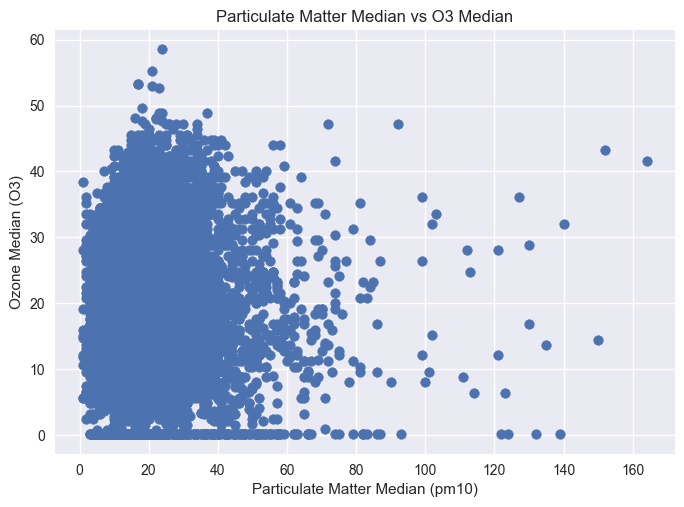

In [127]:
plt.scatter(df['pm10_median'], df['o3_median'])
plt.xlabel("Particulate Matter Median (pm10)")
plt.ylabel("Ozone Median (O3)")
plt.title("Particulate Matter Median vs O3 Median")
plt.show()

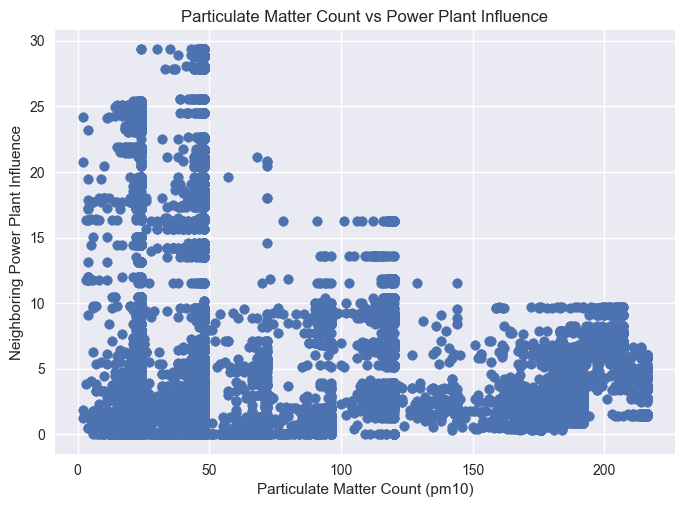

In [126]:
plt.scatter(df['pm10_count'], df['pp_feat'])
plt.xlabel("Particulate Matter Count (pm10)")
plt.ylabel("Neighboring Power Plant Influence")
plt.title("Particulate Matter Count vs Power Plant Influence")
plt.show()

In [137]:
# Applying the log10 function to population not staying at home
df['Population_Not_Home_Log'] = np.log10(df['Population Not Staying at Home'])
df['Population_Staying_Home_Log'] = np.log10(df['Population Staying at Home'])

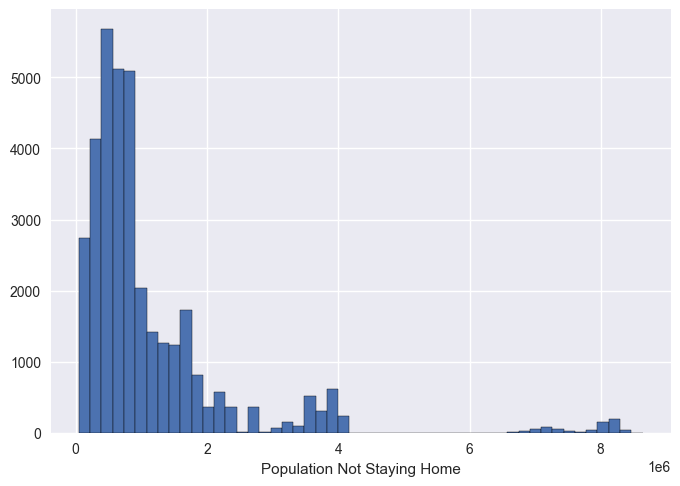

In [138]:
pollu_hist(df['Population Not Staying at Home'], 50, 'Population Not Staying Home')

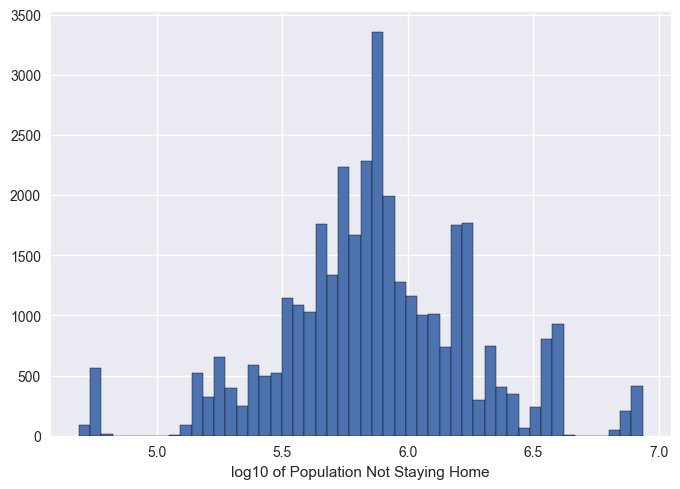

In [139]:
# Creating histogram of population log10
pollu_hist(df['Population_Not_Home_Log'], 50, "log10 of Population Not Staying Home")

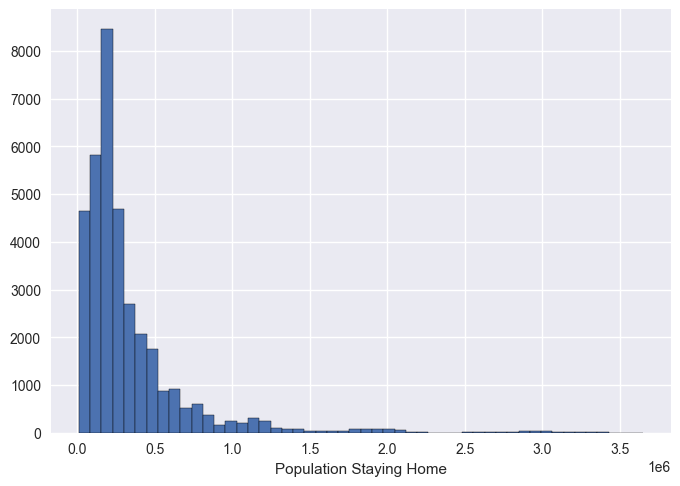

In [140]:
pollu_hist(df['Population Staying at Home'], 50, 'Population Staying Home')

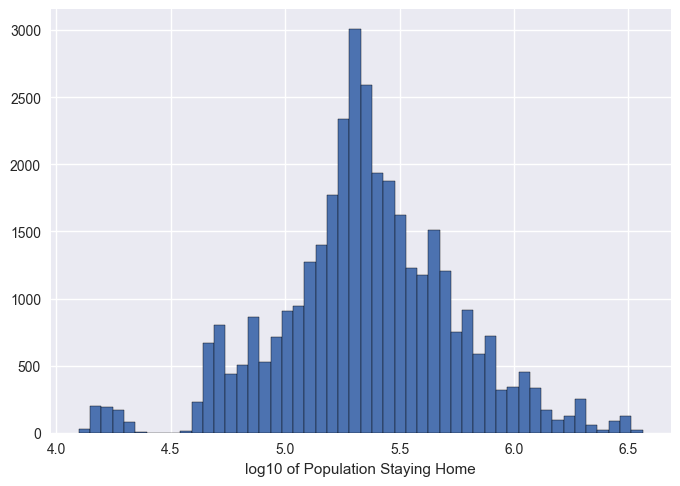

In [141]:
pollu_hist(df['Population_Staying_Home_Log'], 50, 'log10 of Population Staying Home')

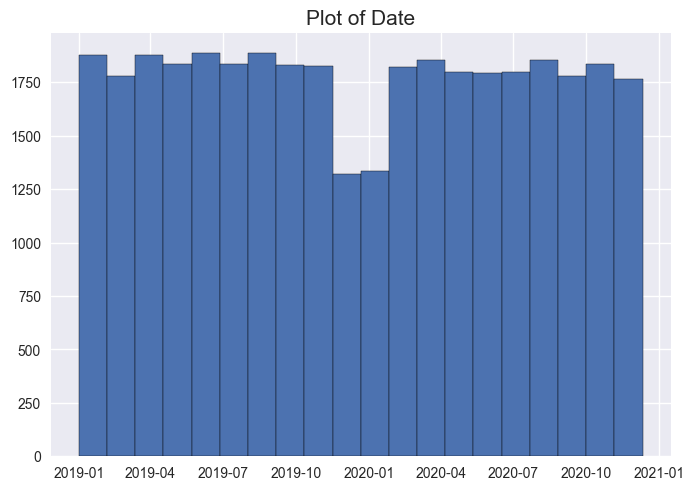

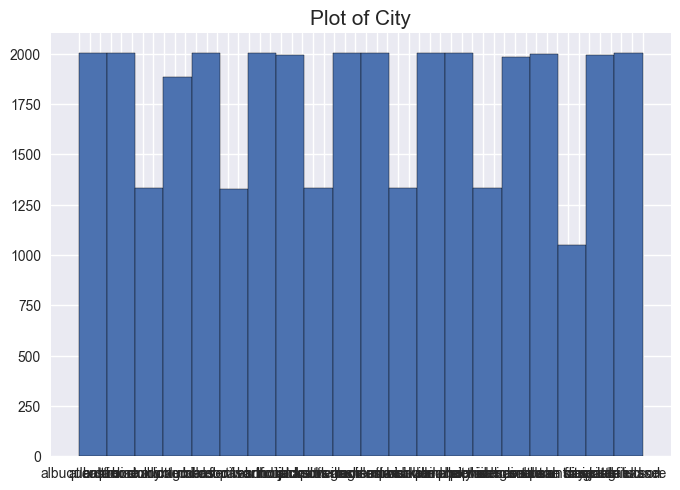

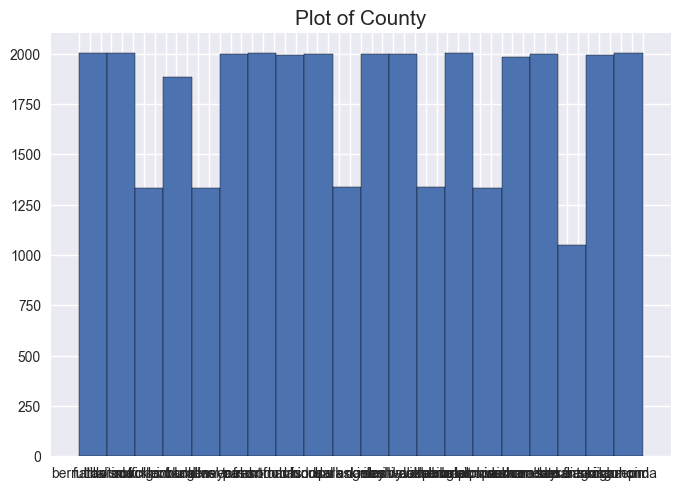

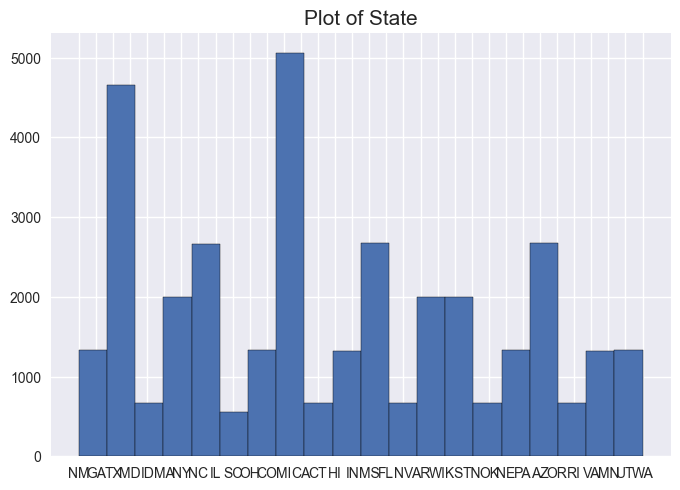

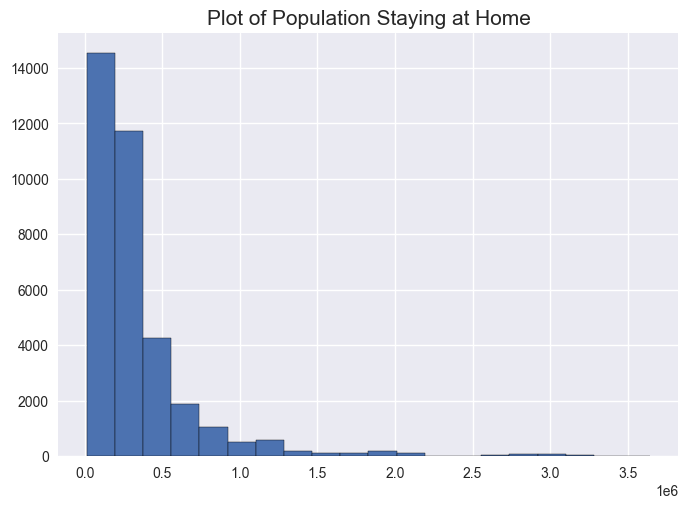

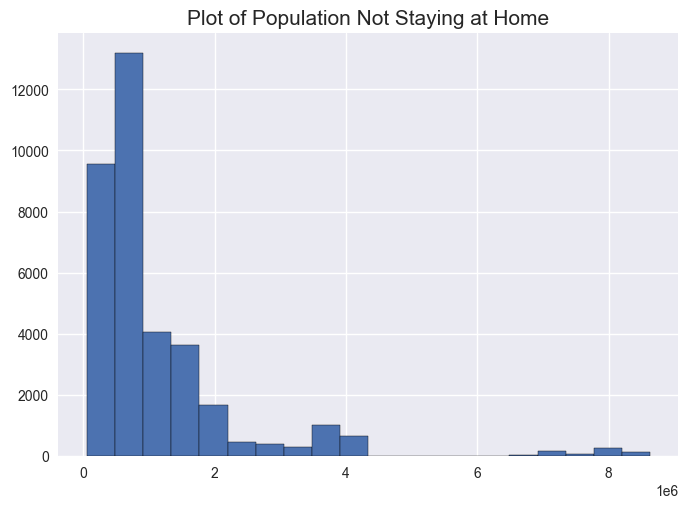

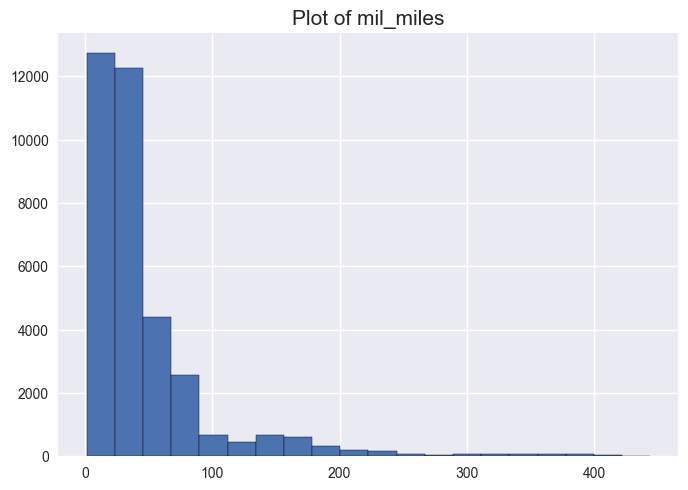

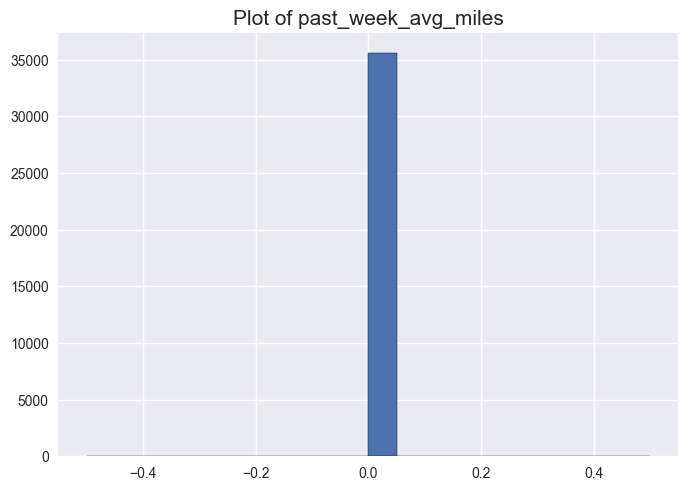

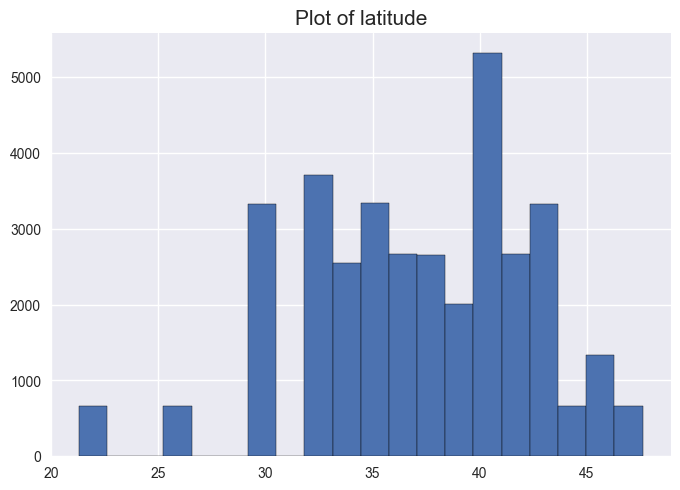

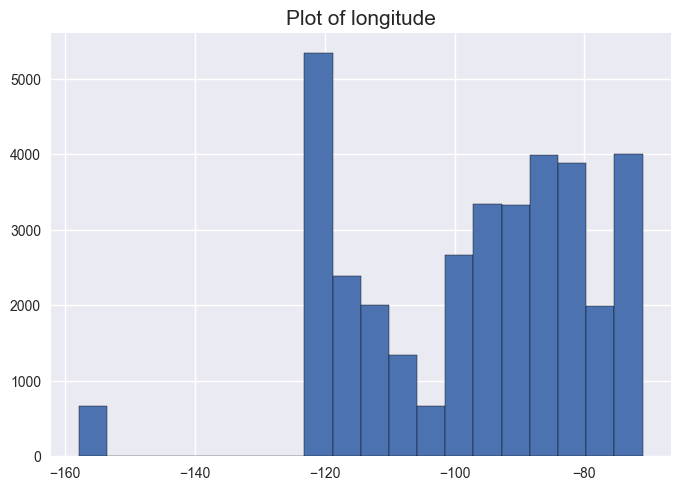

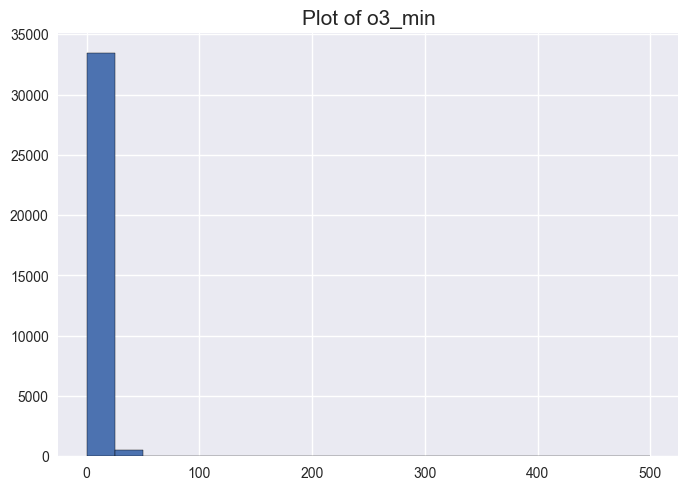

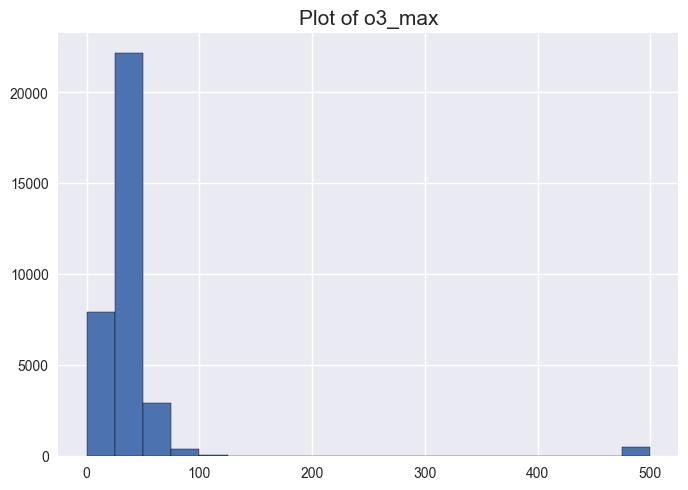

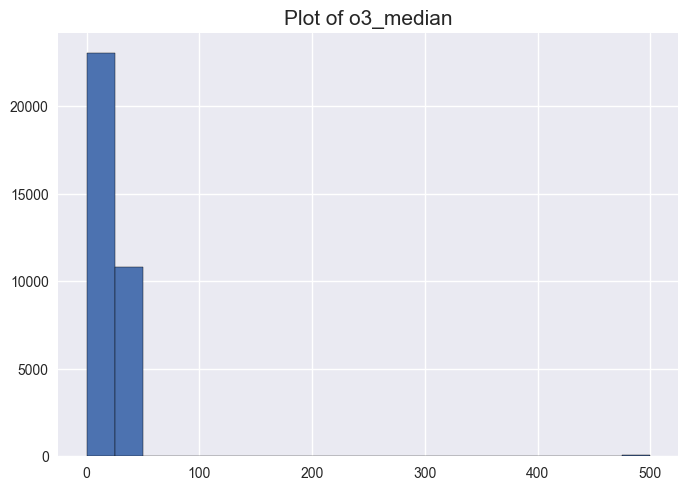

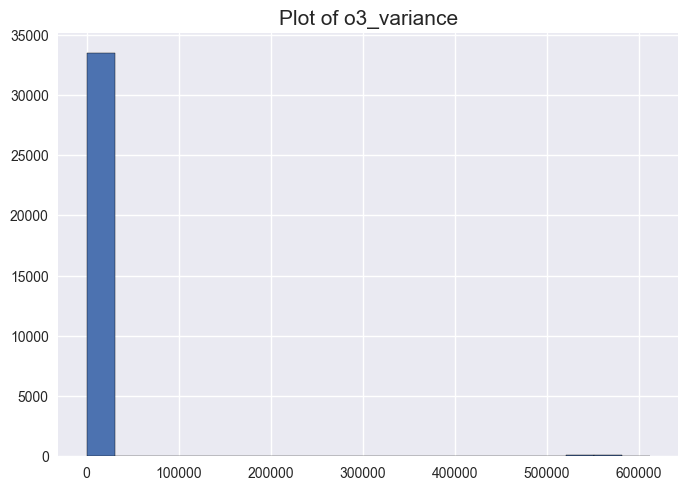

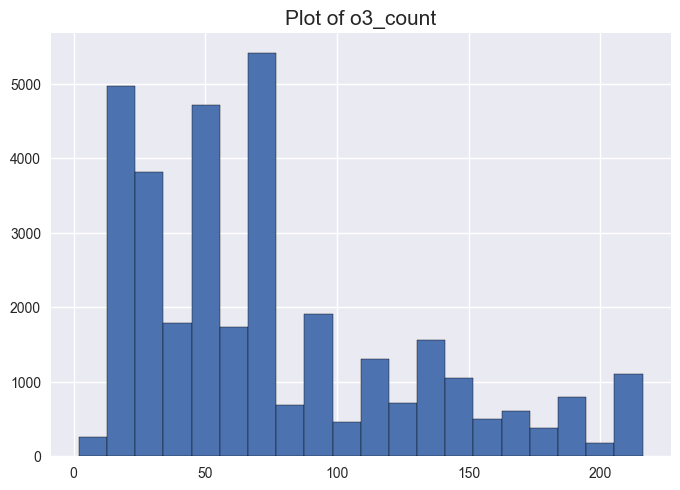

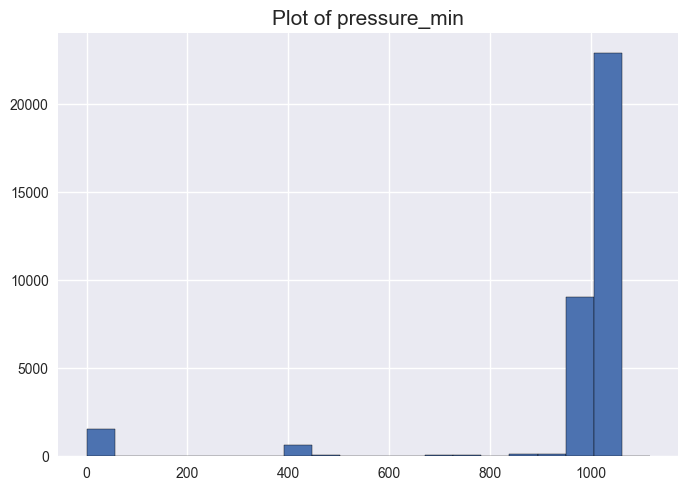

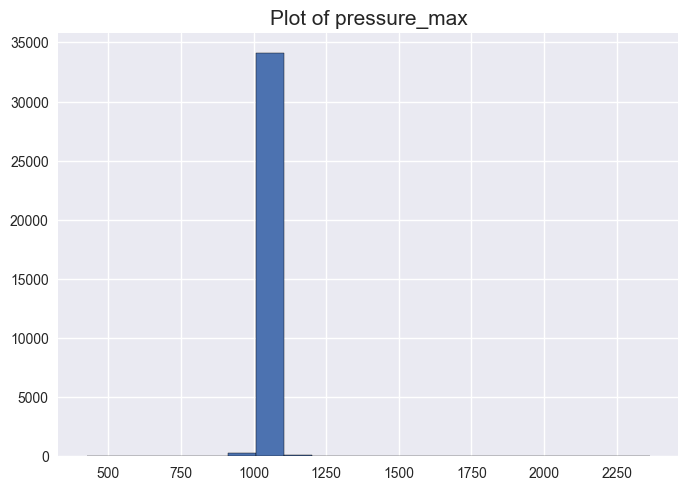

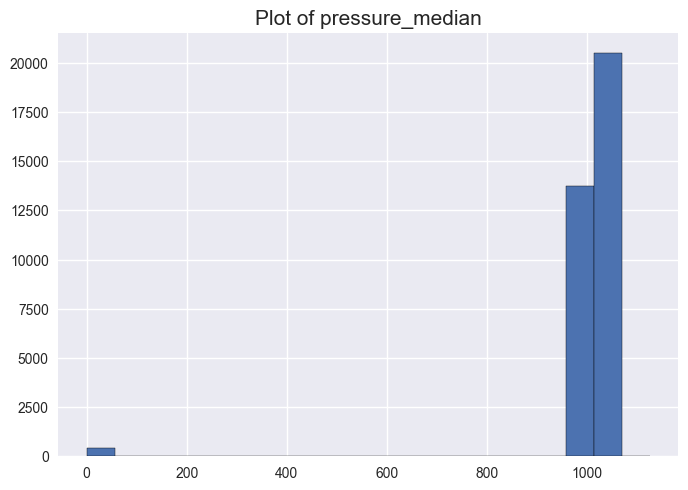

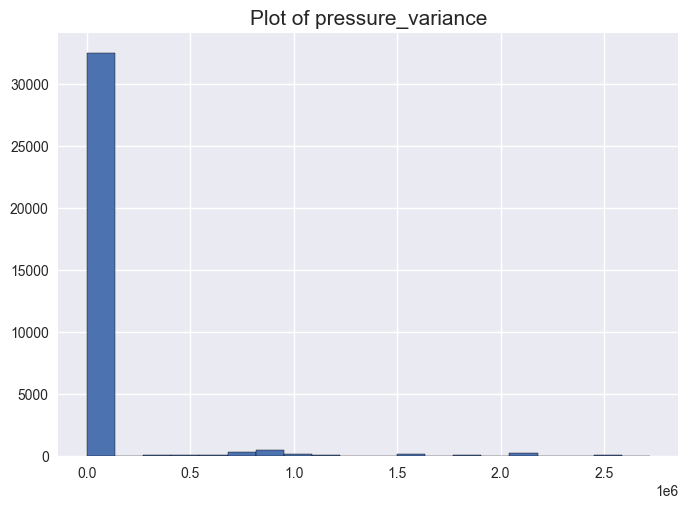

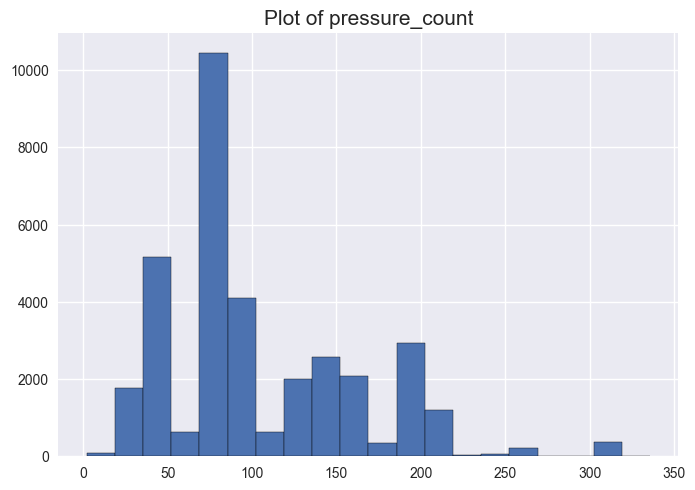

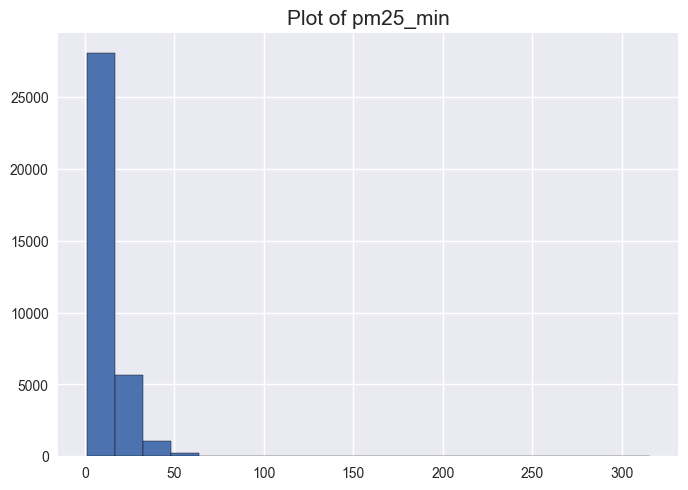

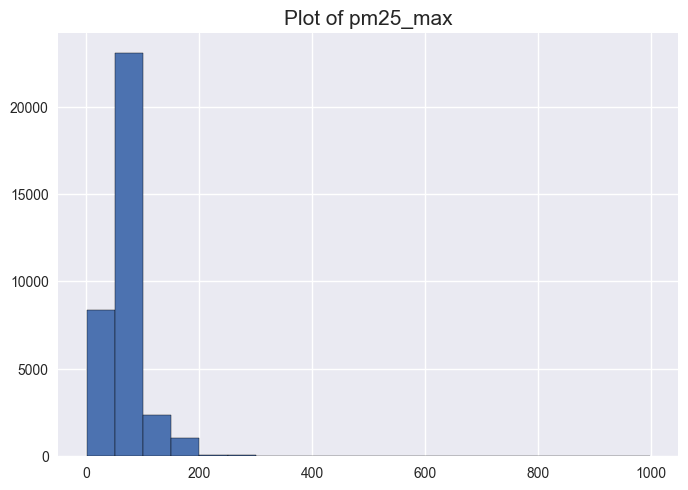

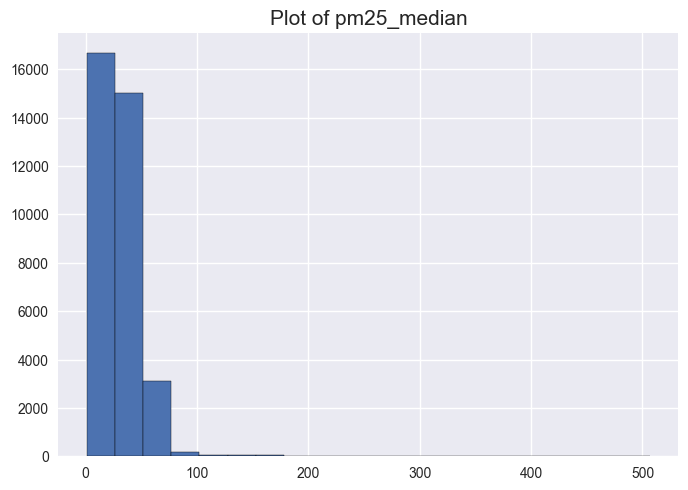

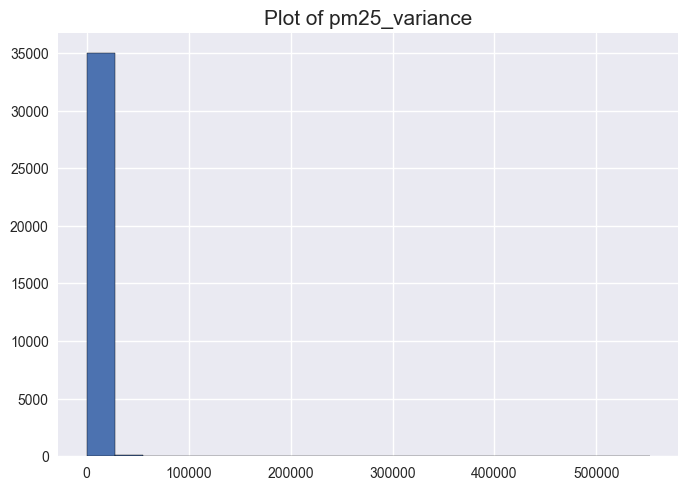

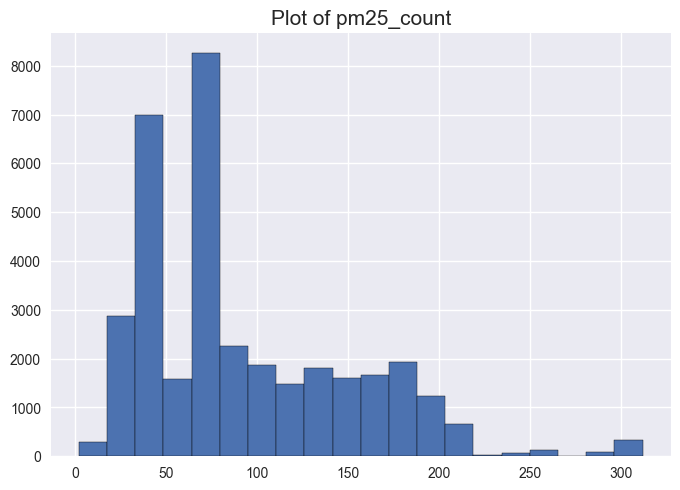

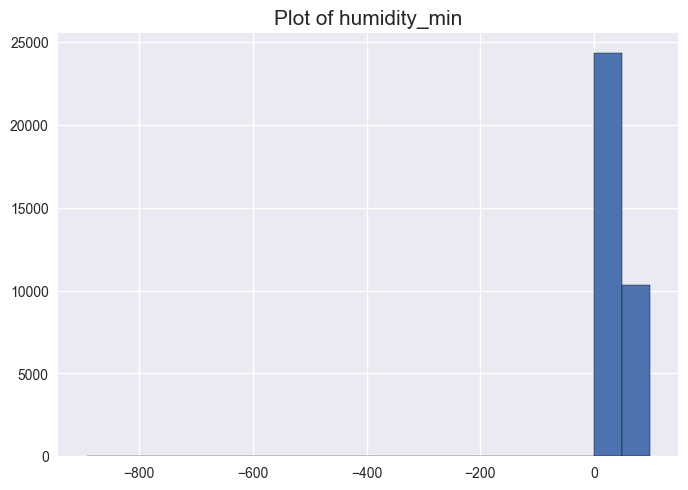

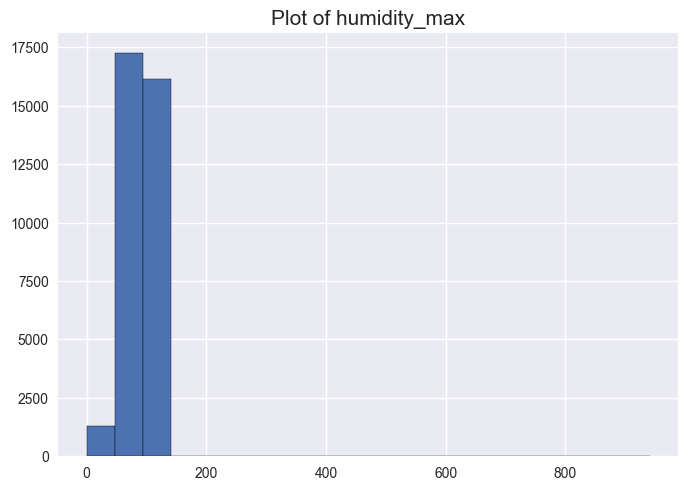

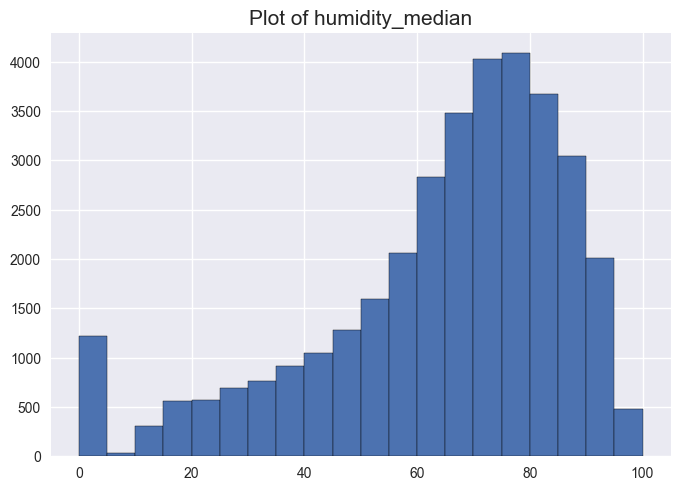

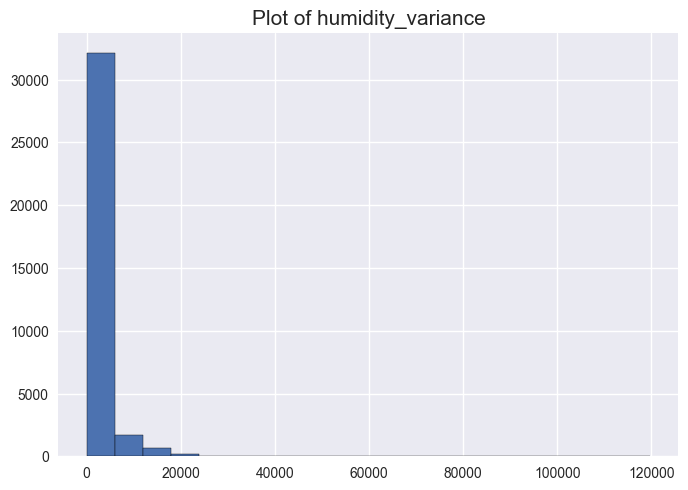

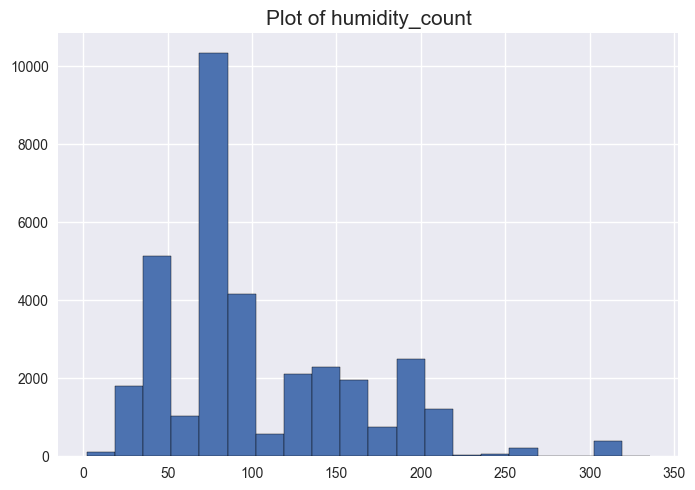

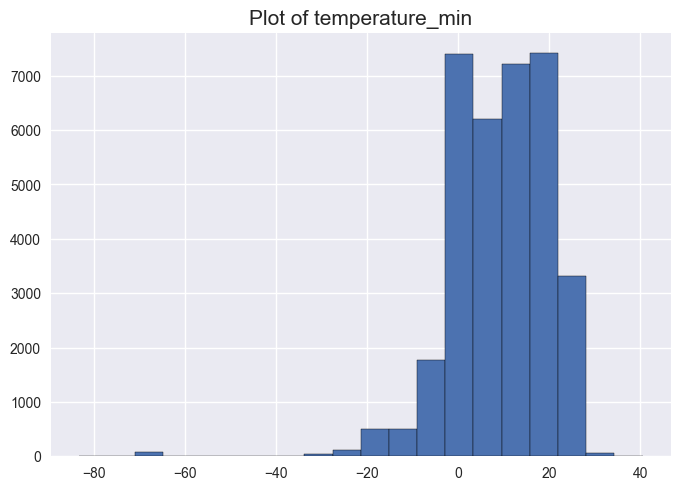

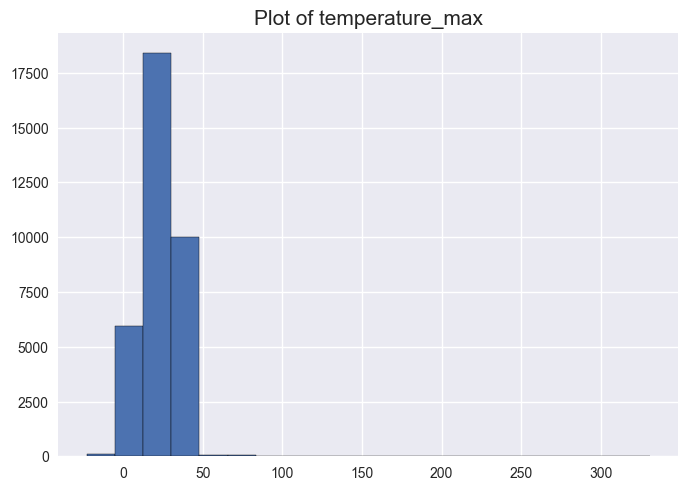

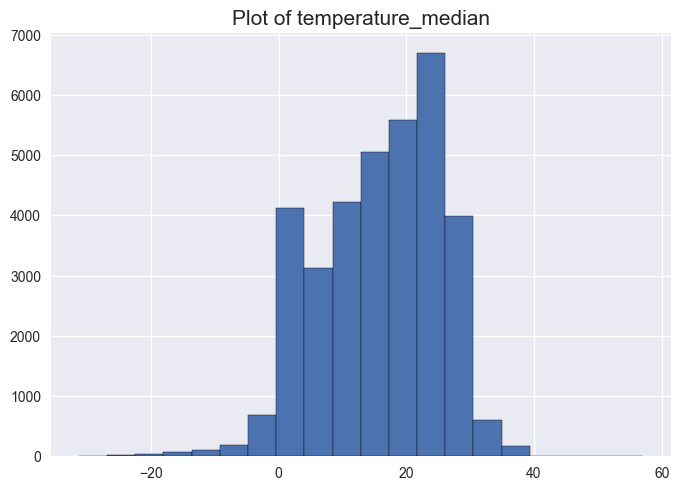

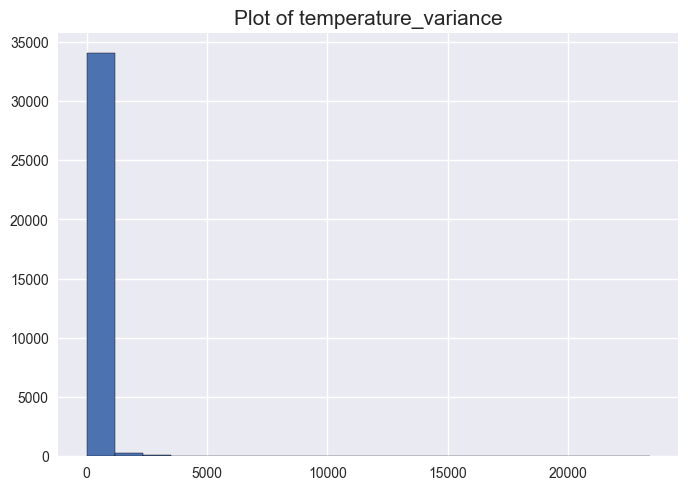

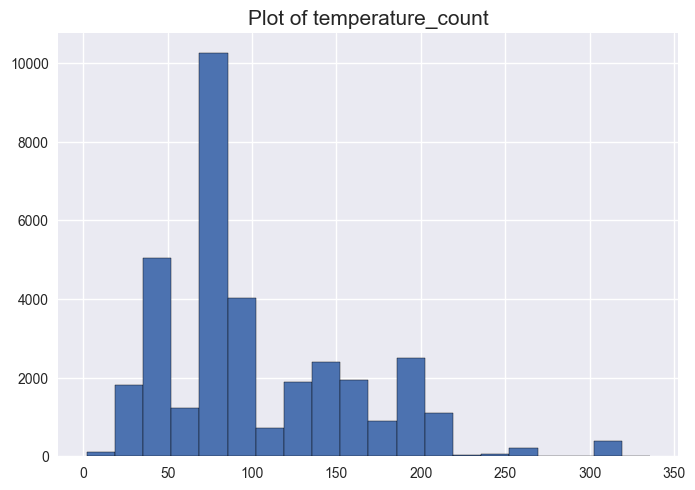

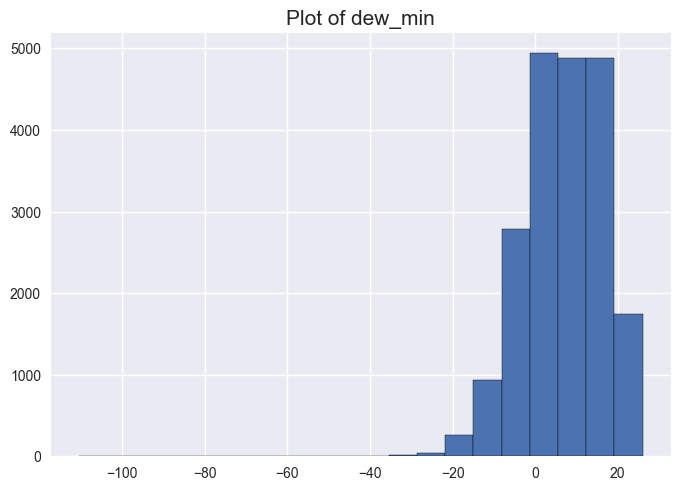

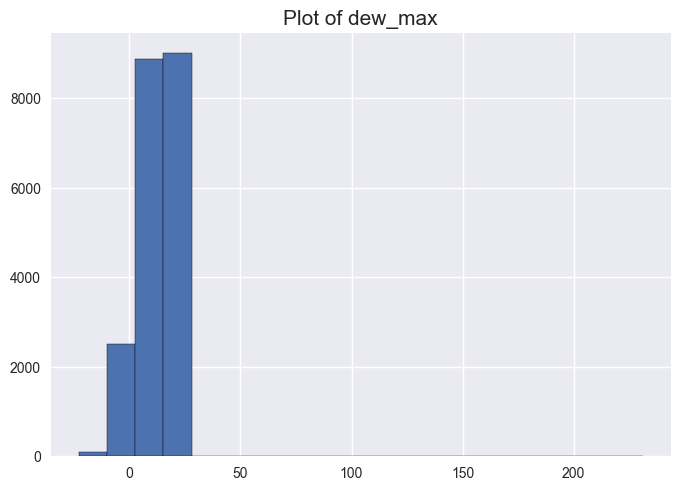

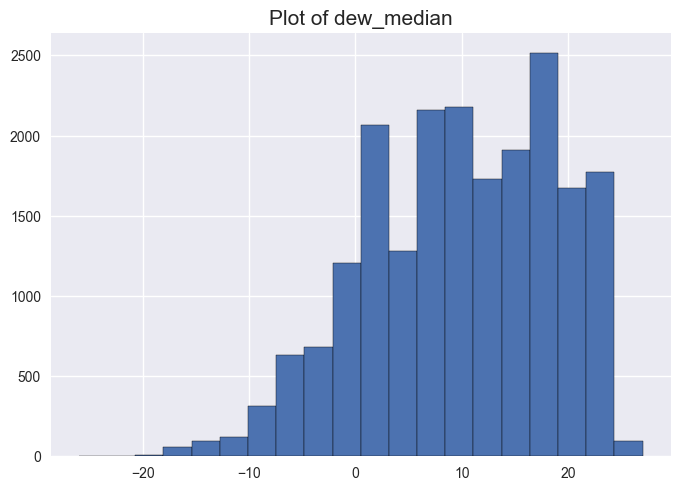

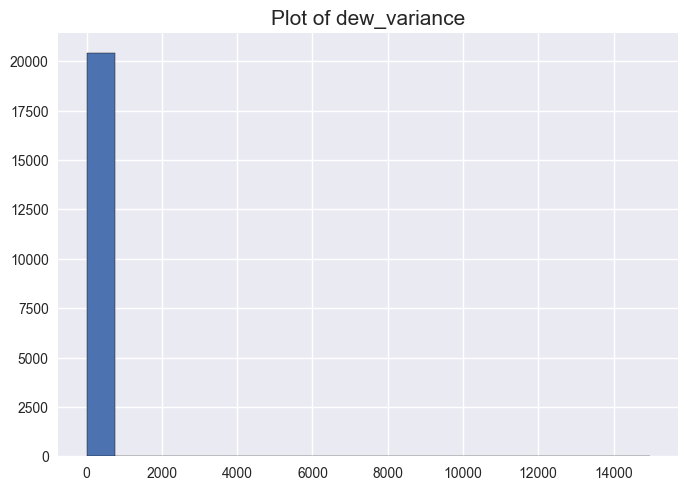

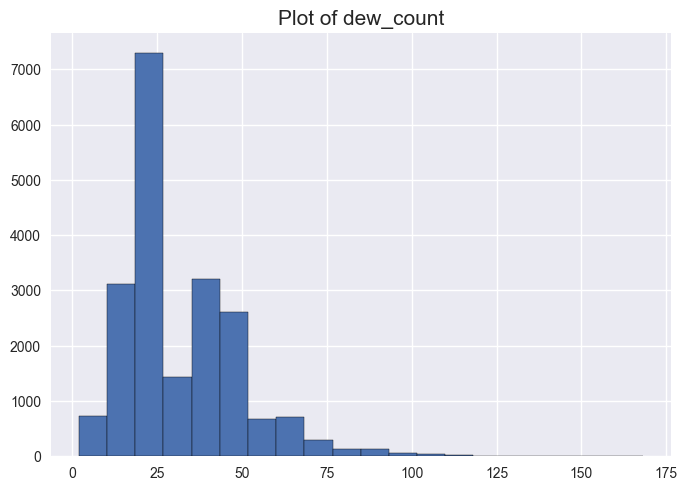

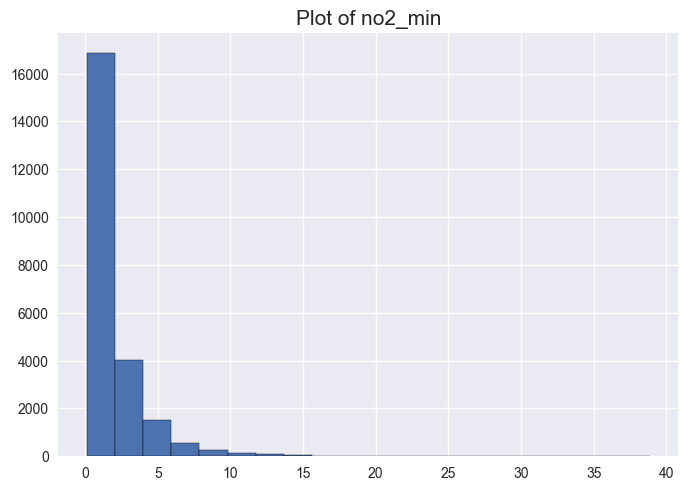

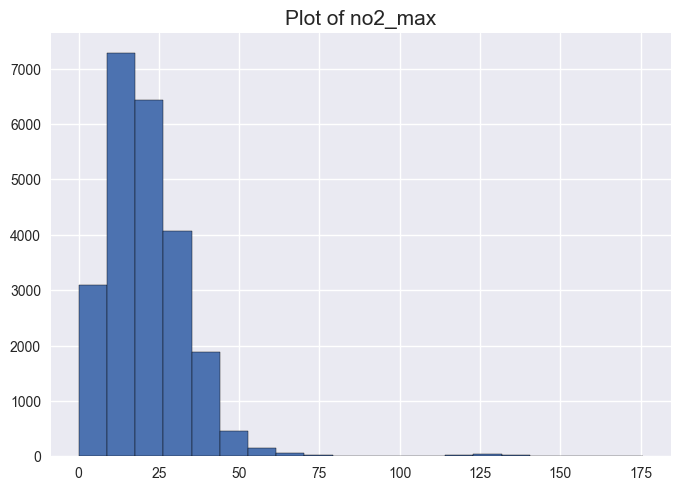

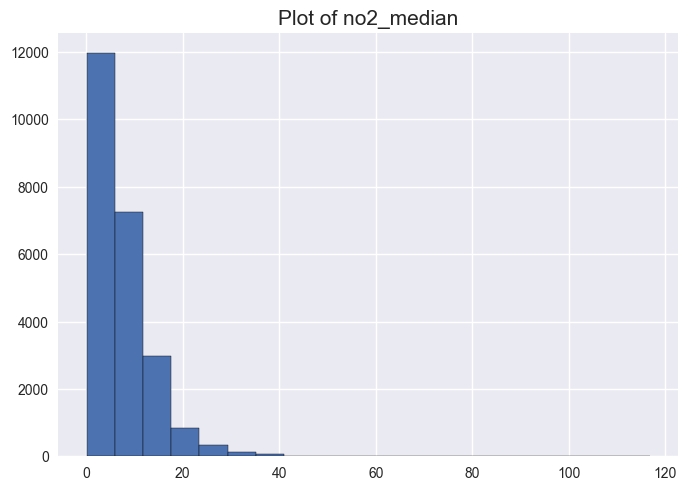

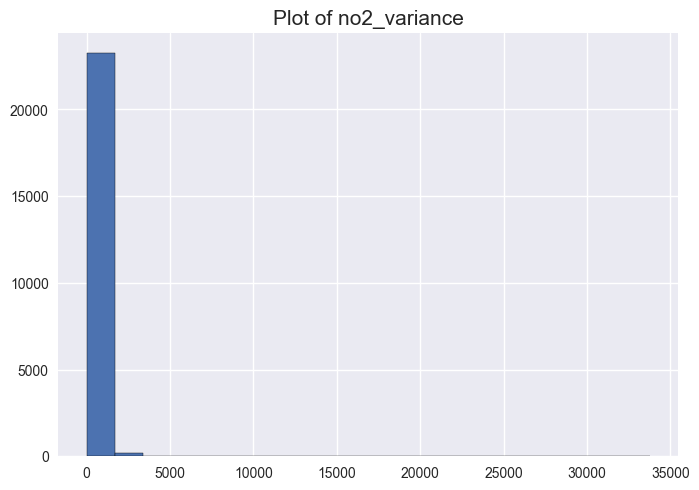

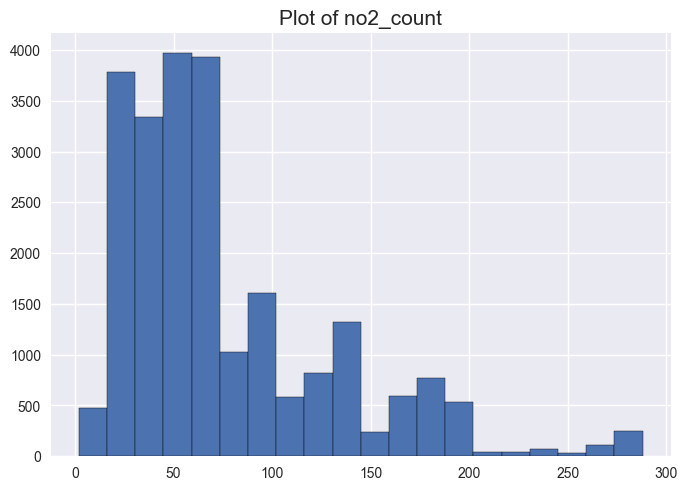

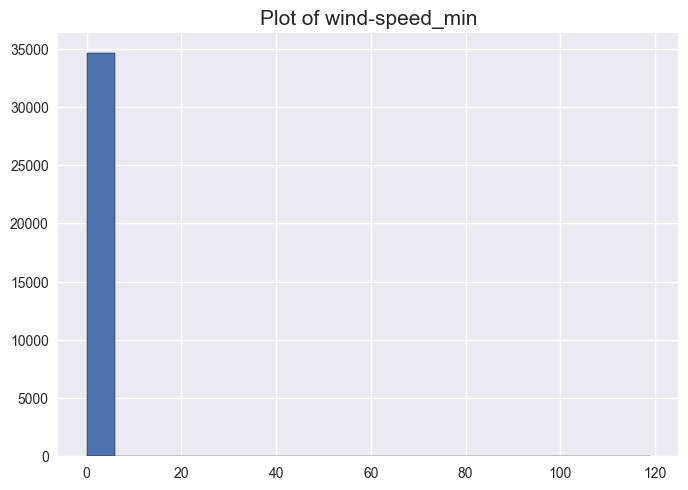

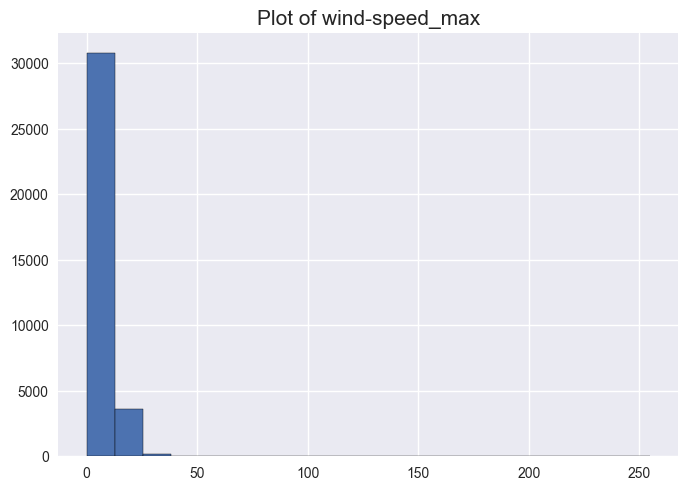

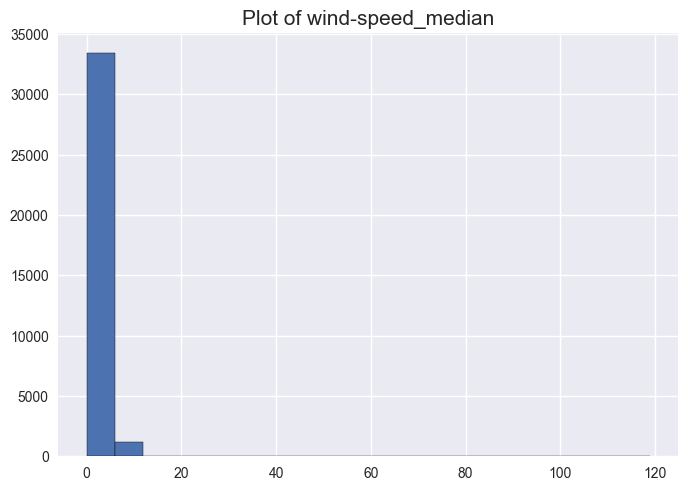

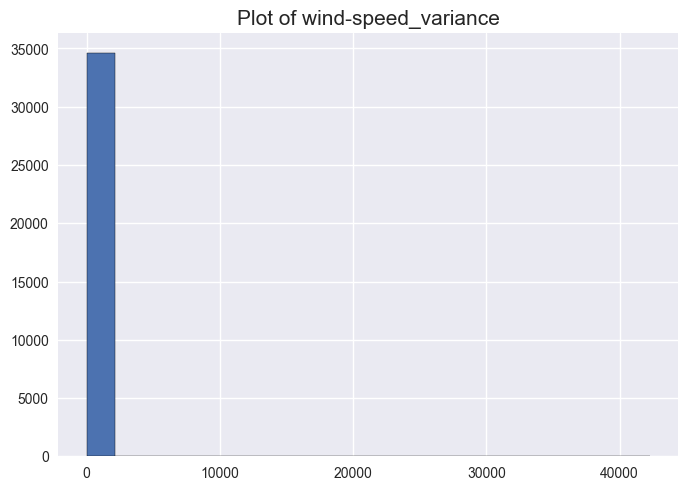

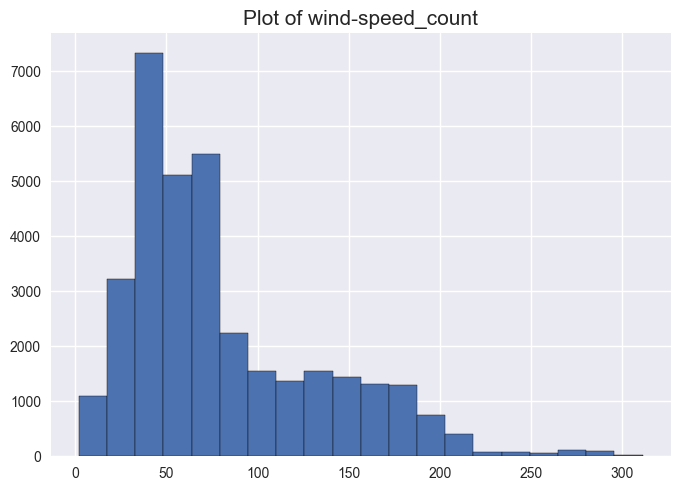

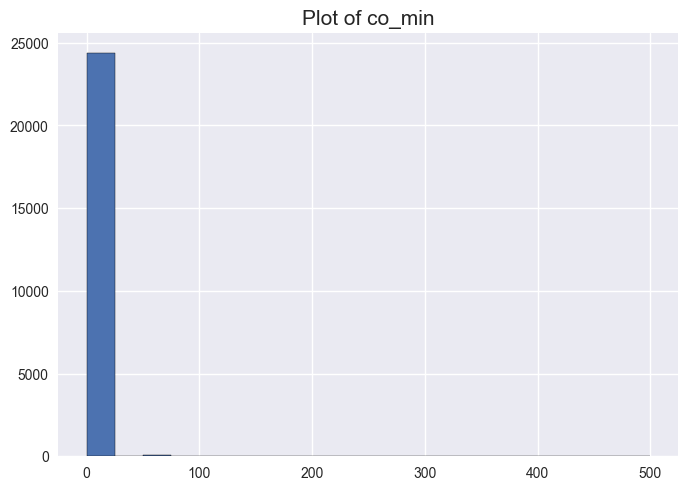

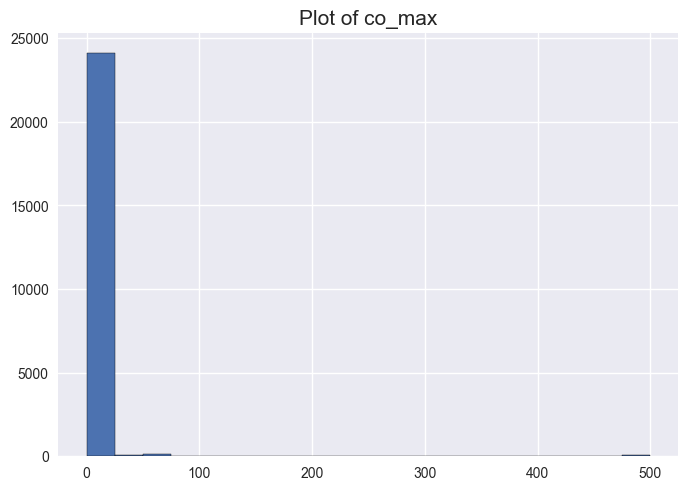

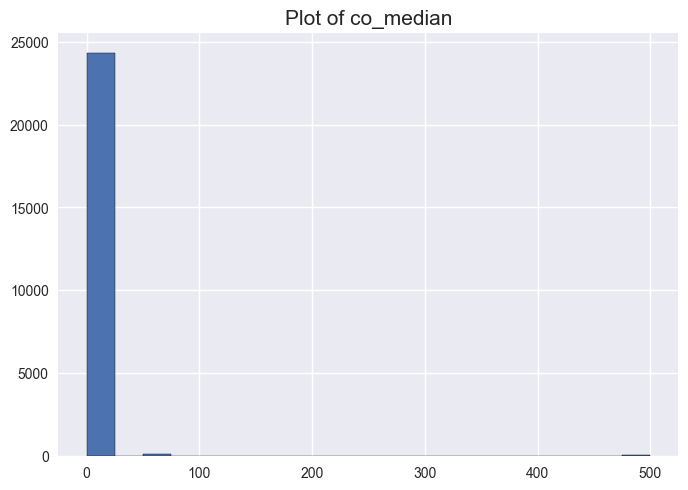

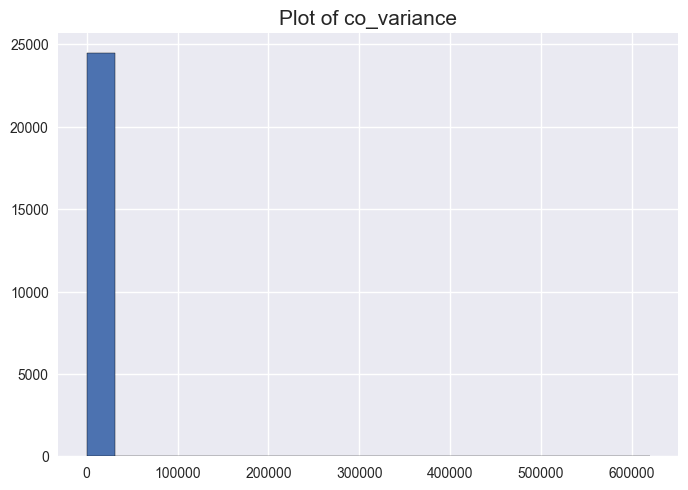

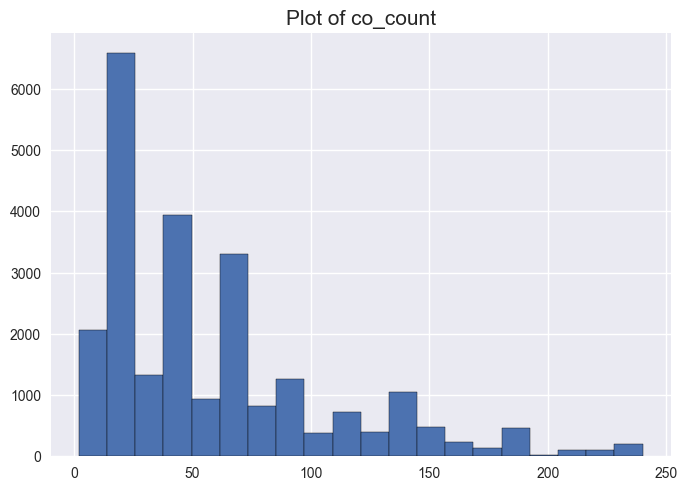

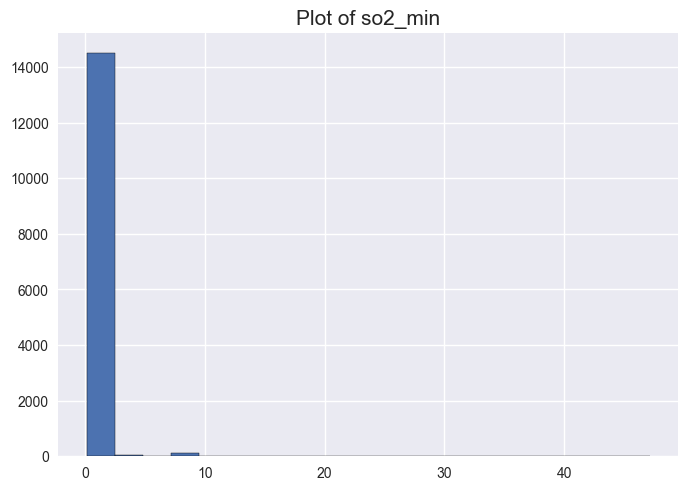

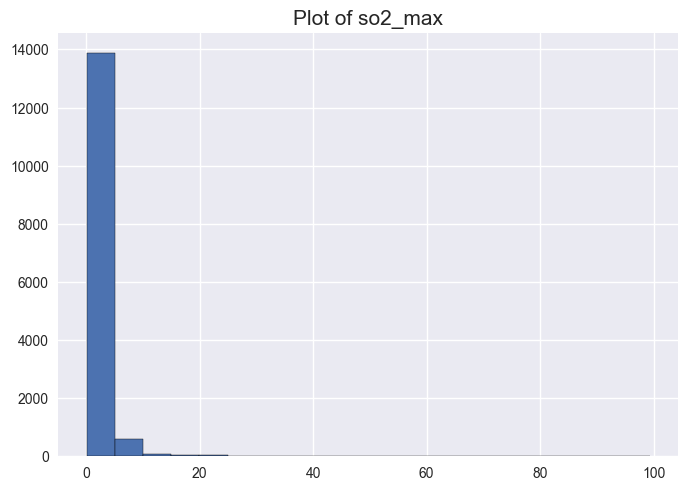

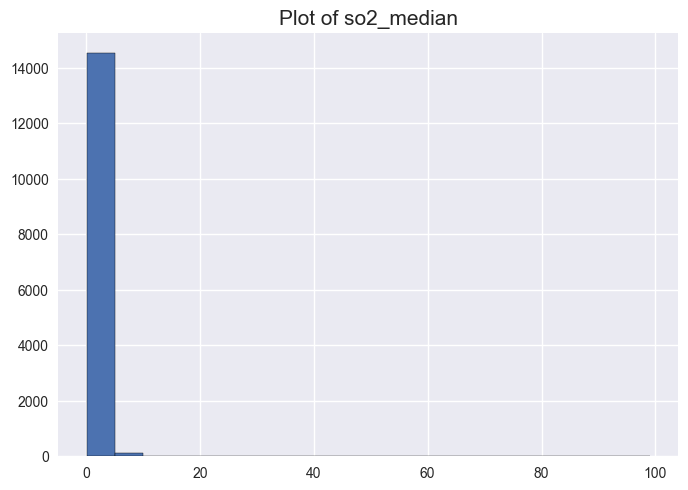

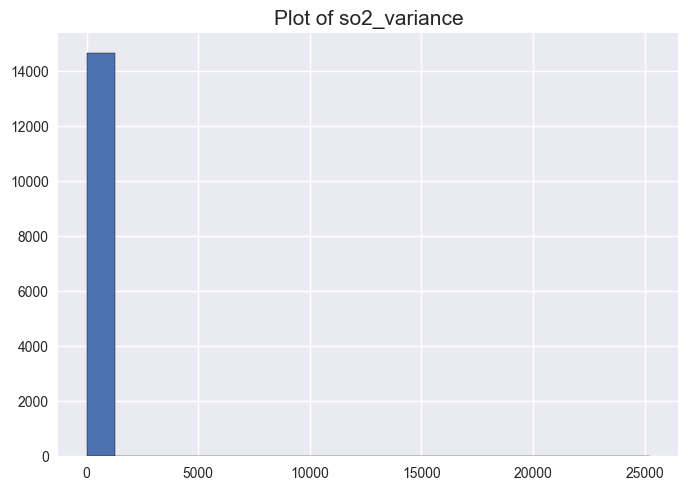

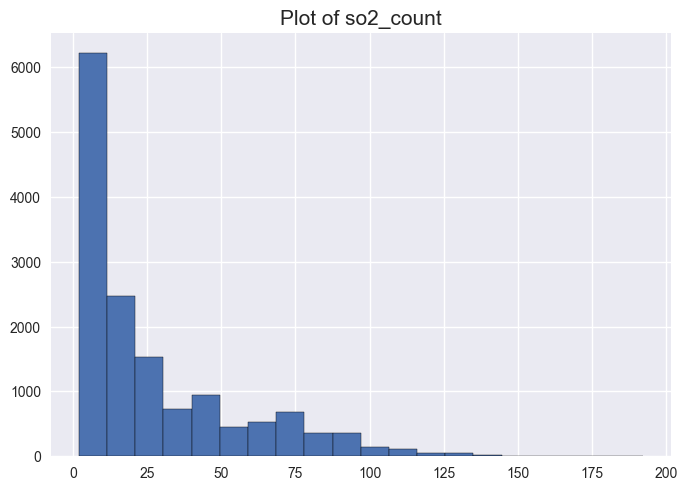

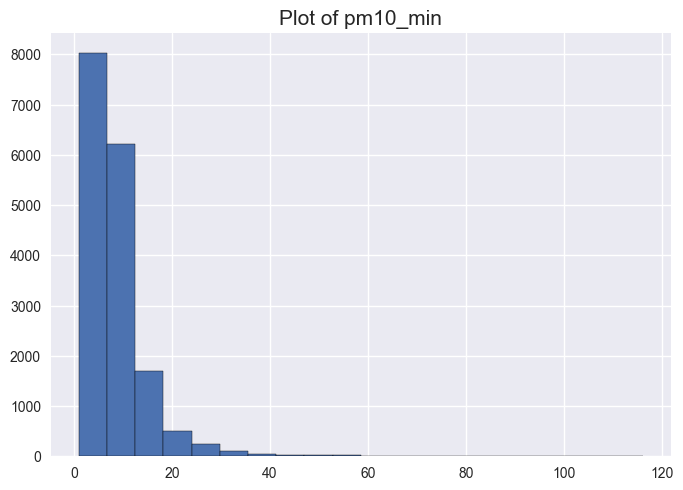

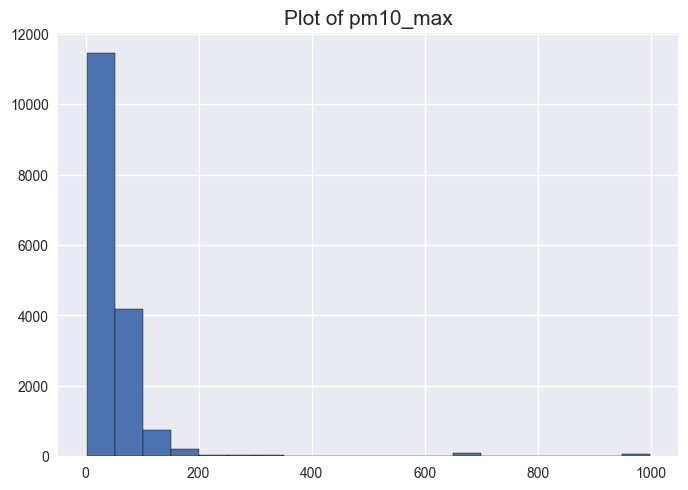

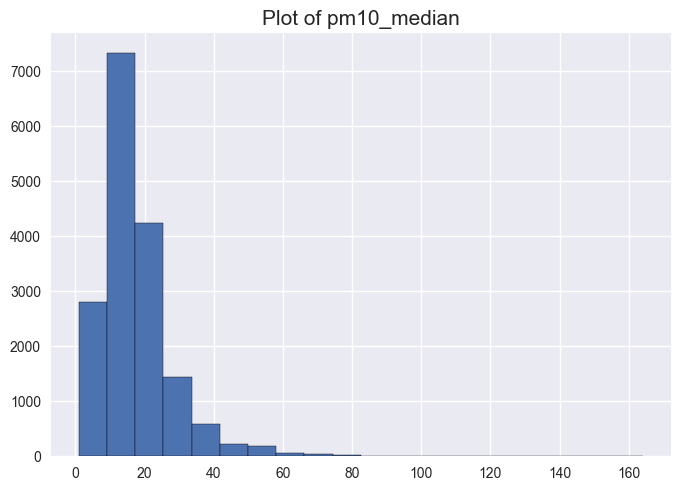

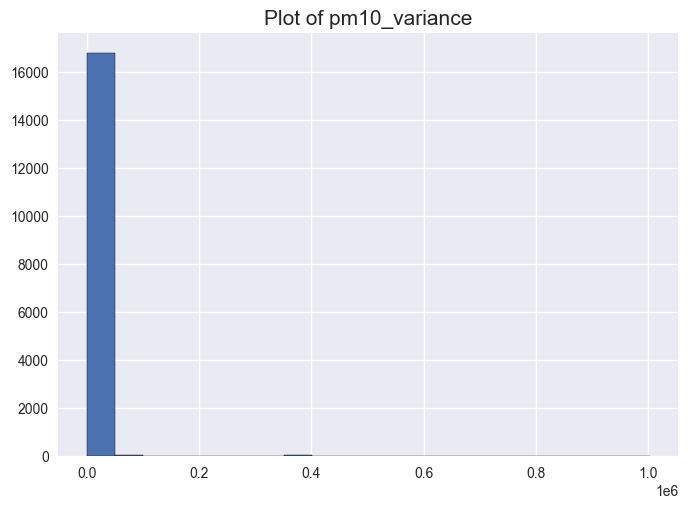

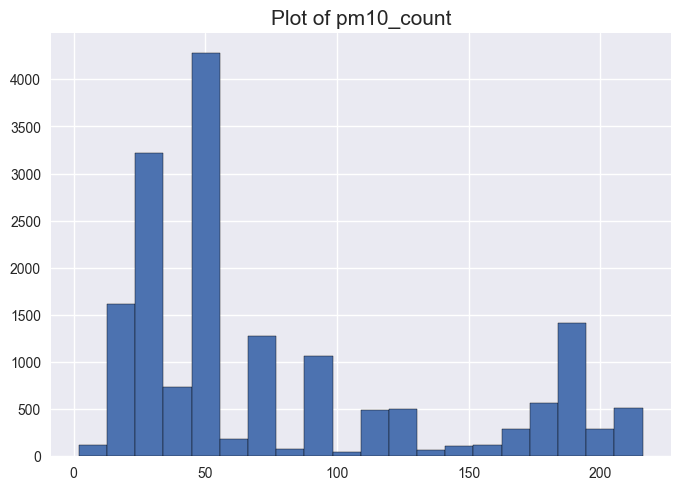

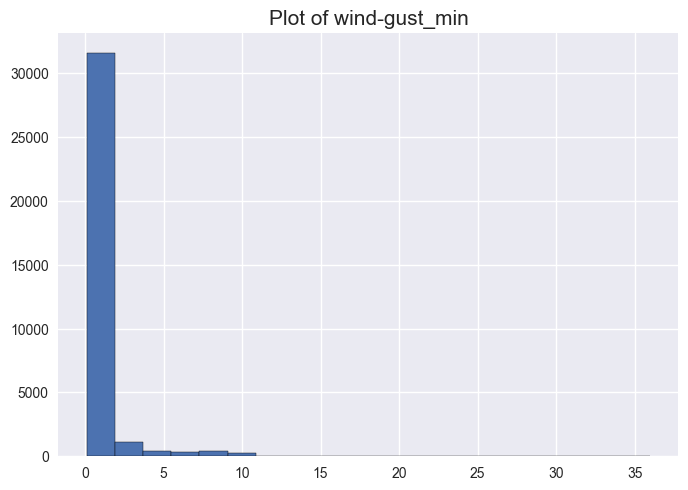

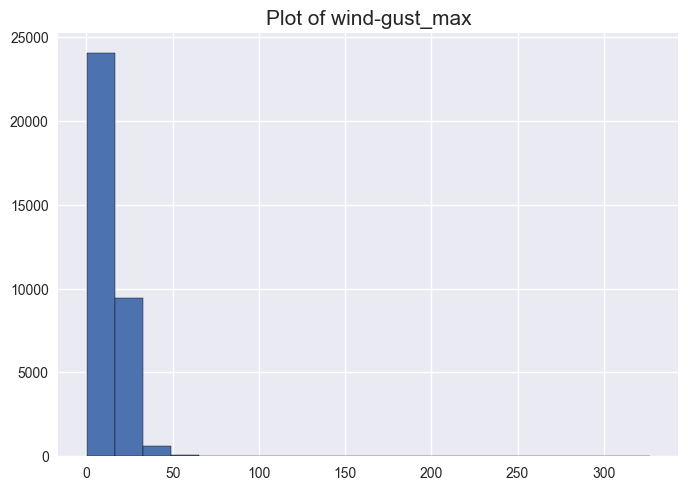

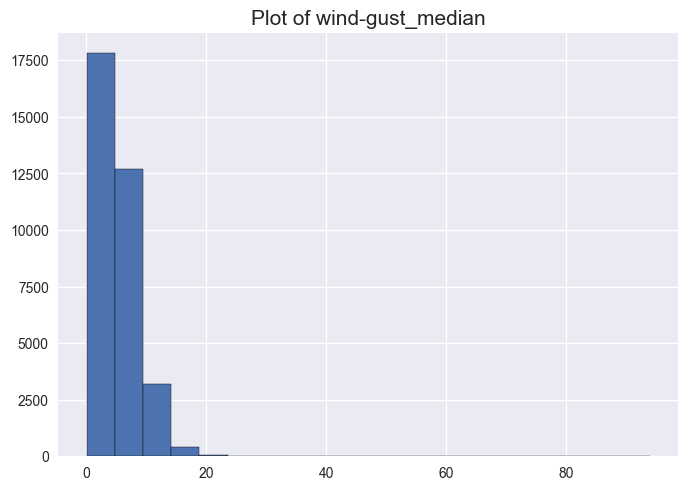

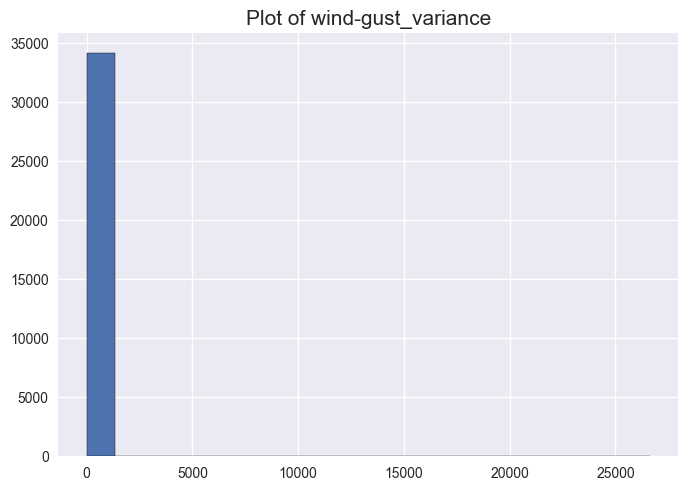

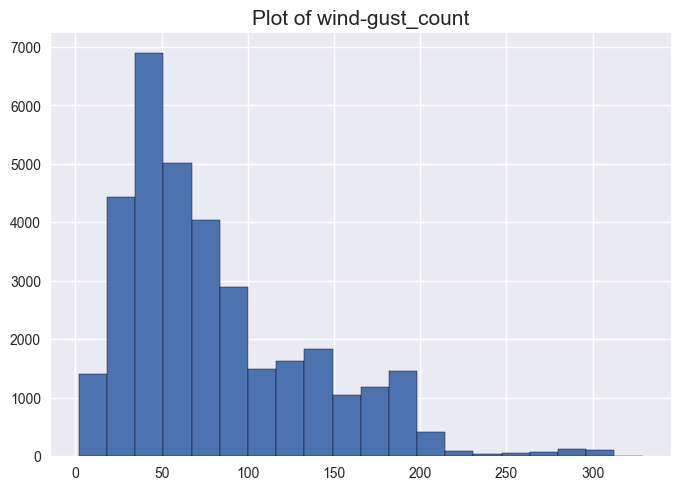

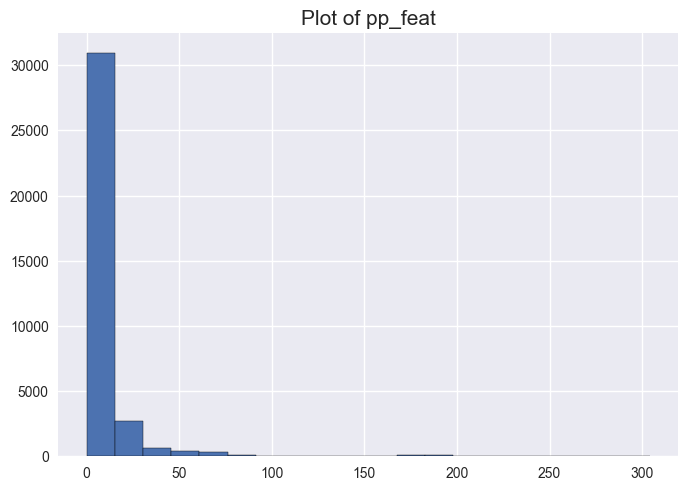

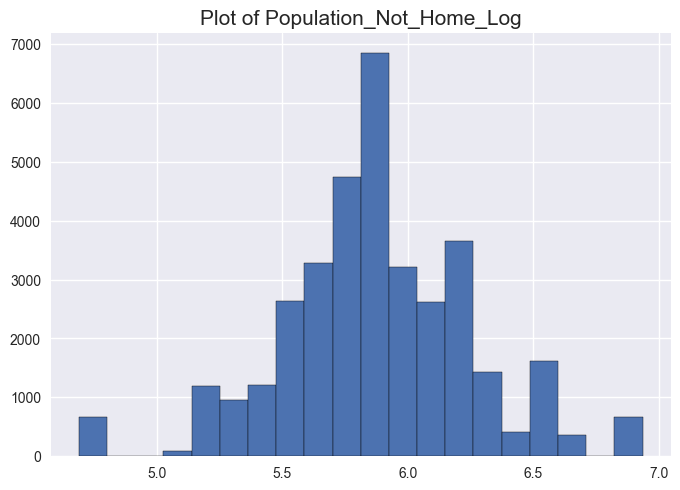

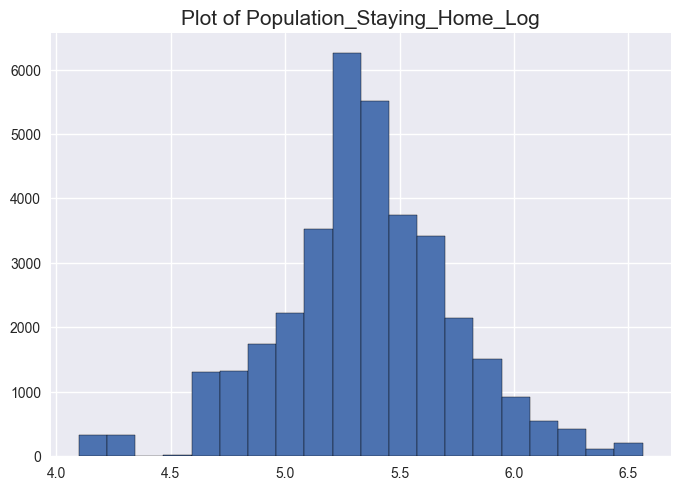

In [145]:
for feature in df.columns:
    plt.title("Plot of "+feature,fontsize=15)
    plt.hist(df[feature],bins=20, edgecolor='black')
    plt.show()

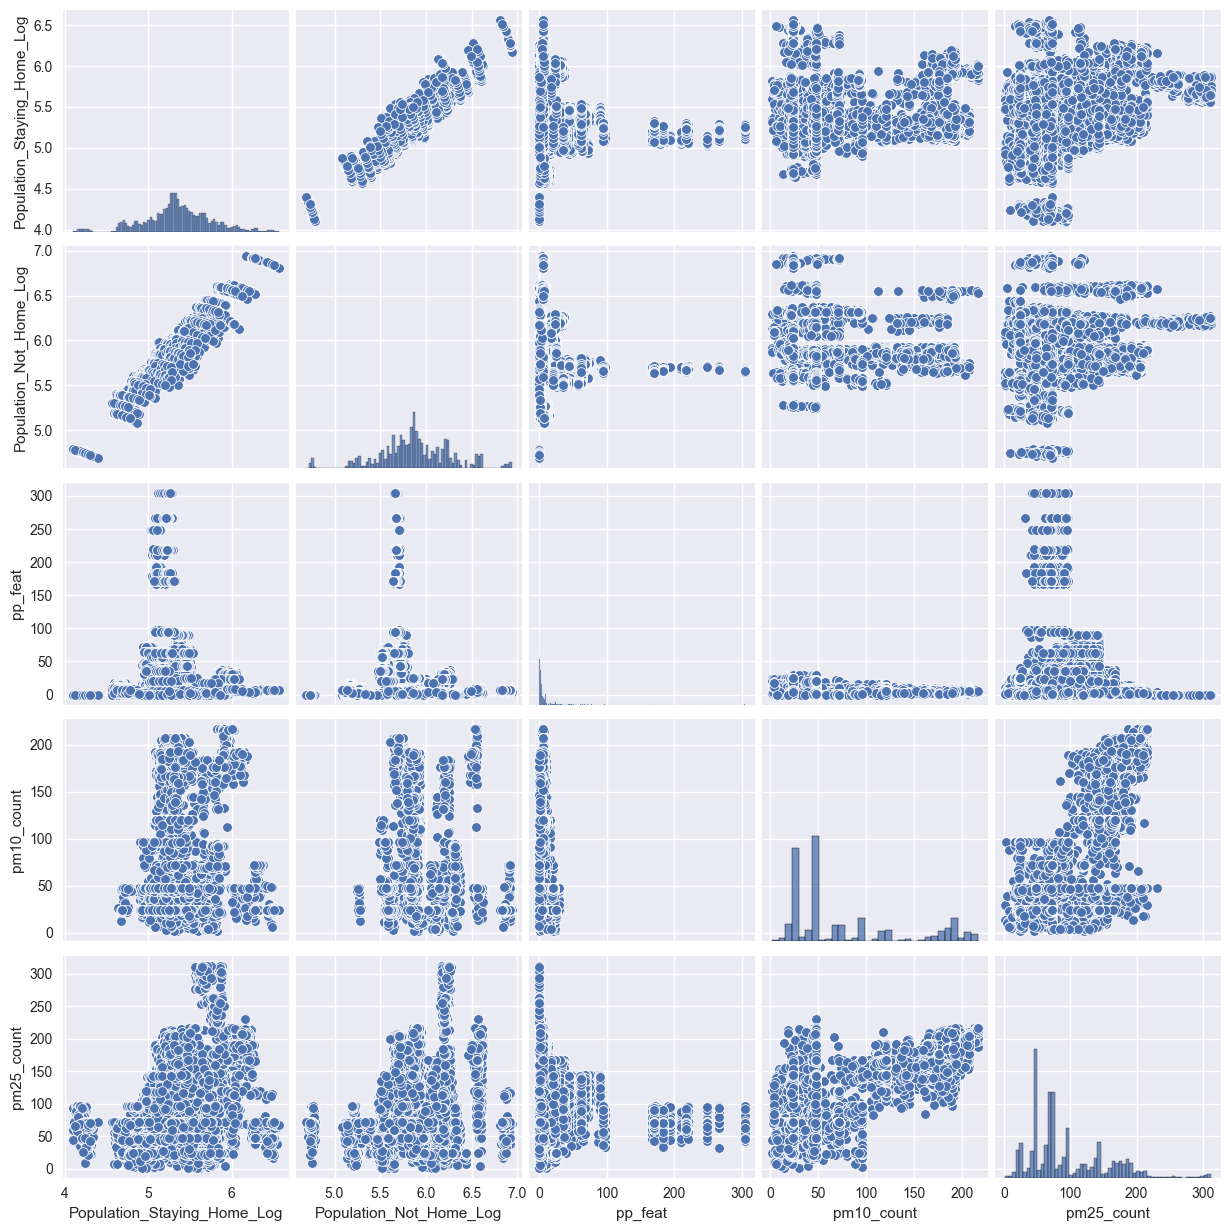

In [146]:
sns.pairplot(data=df,
             y_vars=['Population_Staying_Home_Log', 'Population_Not_Home_Log','pp_feat','pm10_count', 'pm25_count'], 
             x_vars=['Population_Staying_Home_Log', 'Population_Not_Home_Log','pp_feat','pm10_count', 'pm25_count']
             #diag_kind='kde'
             )

<AxesSubplot:>

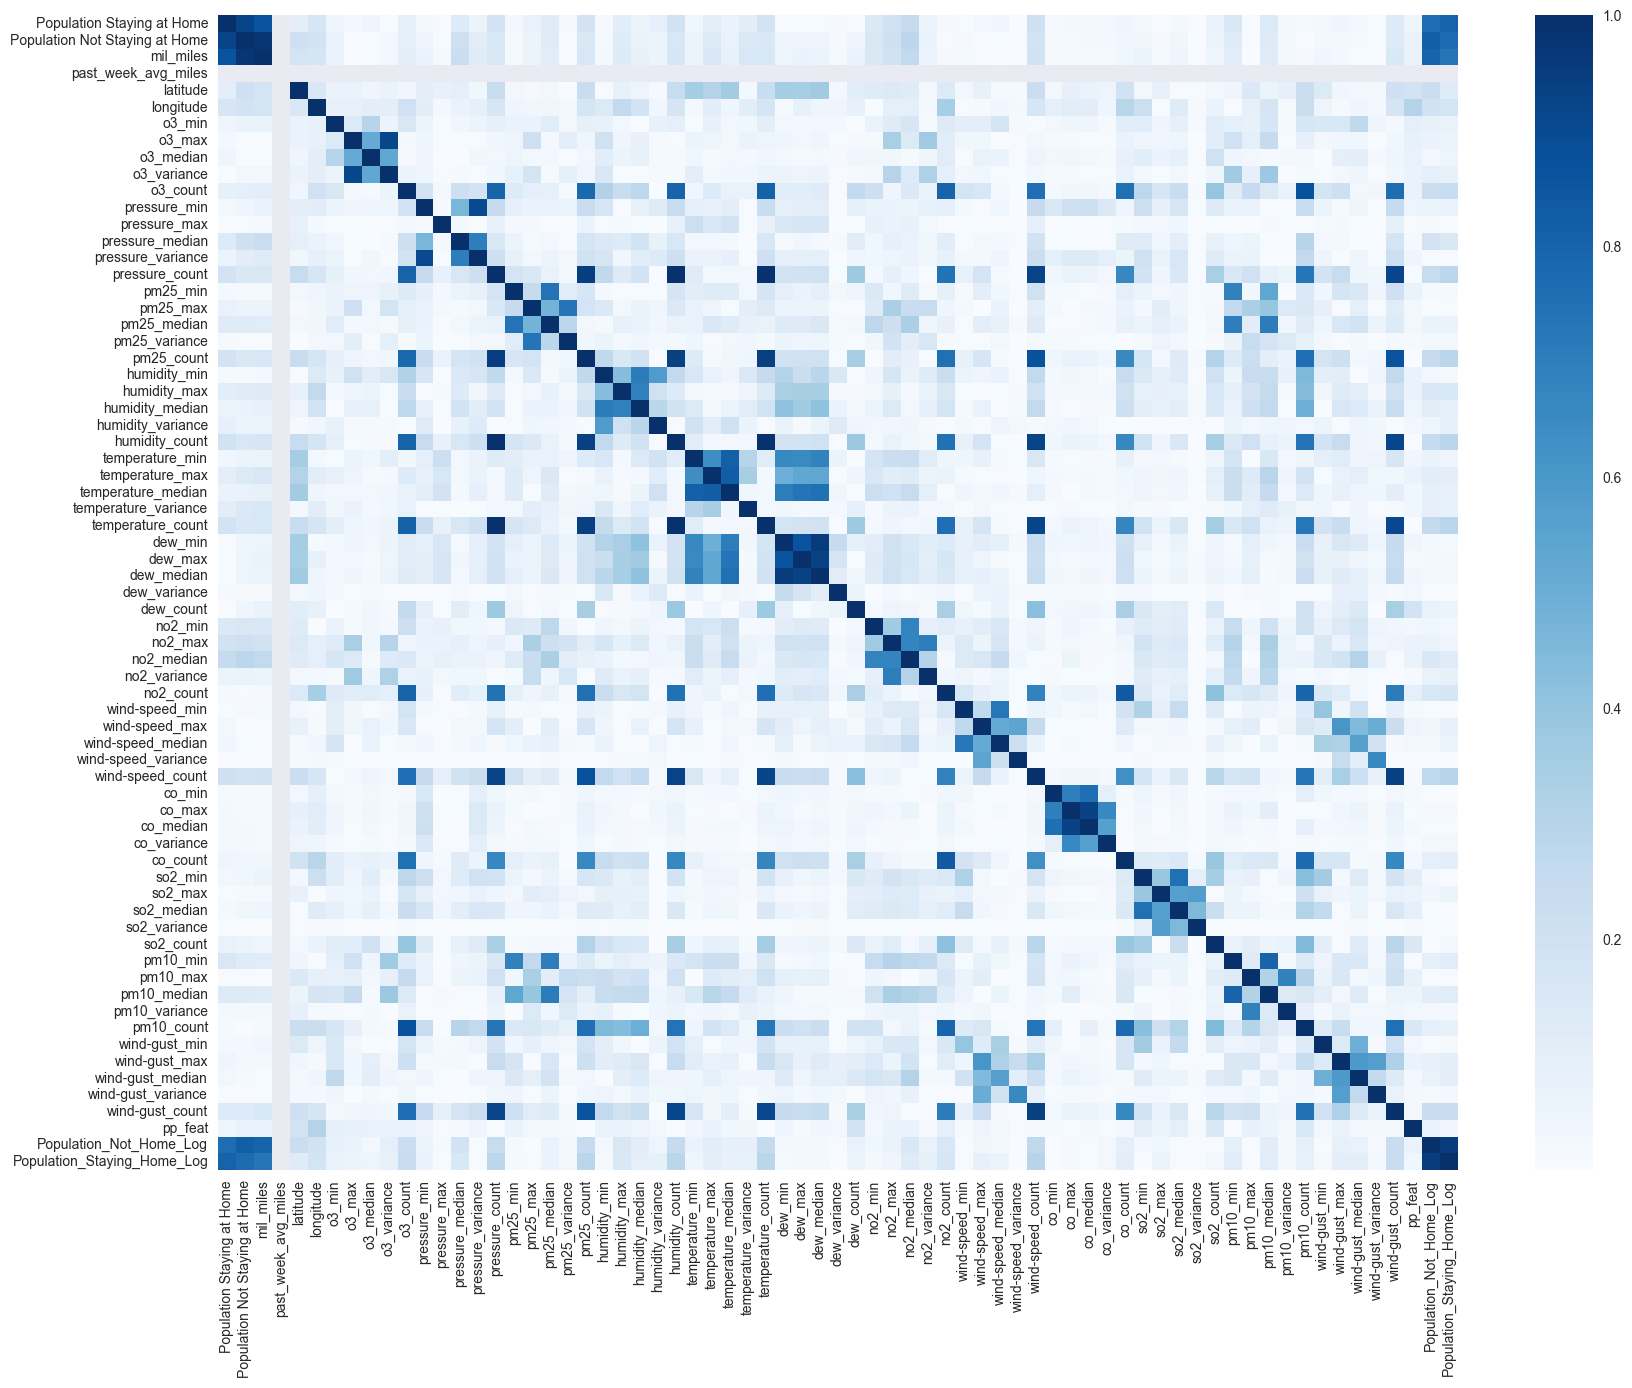

In [147]:
plt.figure(figsize=(20, 15))
sns.heatmap(data=abs(df.corr()), cmap='Blues')

### Filters & Aggregations

In [148]:
df['State'].unique()

array(['NM', 'GA', 'TX', 'MD', 'ID', 'MA', 'NY', 'NC', 'IL', 'SC', 'OH',
       'CO', 'MI', 'CA', 'CT', 'HI', 'IN', 'MS', 'FL', 'NV', 'AR', 'WI',
       'KS', 'TN', 'OK', 'NE', 'PA', 'AZ', 'OR', 'RI', 'VA', 'MN', 'UT',
       'WA'], dtype=object)

In [149]:
az_filter = df['State'] == 'AZ' 
ca_filter = df['State'] == 'CA'
ny_filter = df['State'] =='NY'

In [150]:
metrics = ['mean','median','min','max','std']

In [151]:
df[az_filter].agg(['mean','median','min','max','std']).T

C:\Users\dvisi\AppData\Local\Temp\ipykernel_17304\1450076956.py:1: FutureWarning: ['Date', 'City', 'County', 'State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df[az_filter].agg(['mean','median','min','max','std']).T


,mean,median,min,max,std
Date,NaN,NaN,2019-01-01,2020-12-11,NaN
City,NaN,NaN,phoenix,tucson,NaN
County,NaN,NaN,maricopa,pima,NaN
State,NaN,NaN,AZ,AZ,NaN
Population Staying at Home,610669.336826,518427.0,156053.0,1544689.0,403745.465844
...,...,...,...,...,...
wind-gust_variance,146.367826,126.32,3.65,960.95,101.109398
wind-gust_count,177.778802,183.0,4.0,216.0,22.844397
pp_feat,3.695116,3.606738,0.890146,6.679228,1.39535
Population_Not_Home_Log,6.218912,6.200851,5.830226,6.570908,0.314924


In [177]:
pollutants_loc = ['State','latitude','longitude','o3_count','pm25_count', 'no2_count', 'co_count', 'so2_count', 'pm10_count', 'pp_feat']
pollutants = ['State','o3_count','pm25_count', 'no2_count', 'co_count', 'so2_count', 'pm10_count', 'pp_feat']

In [153]:
df[az_filter].agg(metrics)

C:\Users\dvisi\AppData\Local\Temp\ipykernel_17304\2659899017.py:1: FutureWarning: ['Date', 'City', 'County', 'State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df[az_filter].agg(metrics)


,Date,City,County,State,Population Staying at Home,Population Not Staying at Home,mil_miles,past_week_avg_miles,latitude,longitude,...,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat,Population_Not_Home_Log,Population_Staying_Home_Log
mean,NaN,NaN,NaN,NaN,6.106693e+05,2.110115e+06,88.609452,0.0,32.859815,-111.510401,...,2487.970591,192.125749,0.192780,16.289171,4.803917,146.367826,177.778802,3.695116,6.218912,5.672558
median,NaN,NaN,NaN,NaN,5.184270e+05,1.872990e+06,59.307828,0.0,32.859815,-111.510401,...,1319.465000,191.000000,0.200000,15.200000,4.500000,126.320000,183.000000,3.606738,6.200851,5.694136
min,2019-01-01,phoenix,maricopa,AZ,1.560530e+05,6.764350e+05,16.103528,0.0,32.217037,-112.070988,...,67.440000,66.000000,0.100000,2.000000,1.200000,3.650000,4.000000,0.890146,5.830226,5.193272
max,2020-12-11,tucson,pima,AZ,1.544689e+06,3.723126e+06,194.871781,0.0,33.502593,-110.949815,...,235770.000000,216.000000,4.600000,121.800000,14.800000,960.950000,216.000000,6.679228,6.570908,6.188841
std,NaN,NaN,NaN,NaN,4.037455e+05,1.312786e+06,57.620369,0.0,0.643018,0.560796,...,9055.159487,17.447339,0.209337,8.771622,1.934359,101.109398,22.844397,1.395350,0.314924,0.325622


In [154]:
df_copy = df
df_copy.head()

,Date,City,County,State,Population Staying at Home,Population Not Staying at Home,mil_miles,past_week_avg_miles,latitude,longitude,...,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat,Population_Not_Home_Log,Population_Staying_Home_Log
0,2019-01-01,albuquerque,bernalillo,NM,177171,499456,19.038463,0.0,35.107209,-106.617209,...,5303.29,48.0,0.3,27.3,3.8,839.84,54.0,0.319492,5.698497,5.248393
1,2019-01-01,atlanta,fulton,GA,283093,763811,29.295609,0.0,33.760109,-84.402826,...,280.83,23.0,0.1,4.5,1.7,12.11,44.0,23.304216,5.882986,5.451929
2,2019-01-01,austin,travis,TX,268732,976194,27.286079,0.0,30.283333,-97.750641,...,NaN,NaN,0.2,14.0,6.8,162.34,67.0,14.333042,5.989536,5.429319
3,2019-01-01,baltimore,baltimo,MD,191486,409167,12.961132,0.0,39.305833,-76.610417,...,74.76,24.0,0.1,24.0,8.5,355.46,70.0,6.403240,5.611901,5.282137
4,2019-01-01,boise,ada,ID,105237,363293,12.640954,0.0,43.604545,-116.202424,...,170.86,47.0,0.1,11.3,2.2,46.19,92.0,0.000000,5.560257,5.022168


In [157]:
df2 =df
df2.head()

,Date,City,County,State,Population Staying at Home,Population Not Staying at Home,past_week_avg_miles,latitude,longitude,o3_min,...,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat,Population_Not_Home_Log,Population_Staying_Home_Log
0,2019-01-01,albuquerque,bernalillo,NM,177171,499456,0.0,35.107209,-106.617209,10.4,...,5303.29,48.0,0.3,27.3,3.8,839.84,54.0,0.319492,5.698497,5.248393
1,2019-01-01,atlanta,fulton,GA,283093,763811,0.0,33.760109,-84.402826,1.6,...,280.83,23.0,0.1,4.5,1.7,12.11,44.0,23.304216,5.882986,5.451929
2,2019-01-01,austin,travis,TX,268732,976194,0.0,30.283333,-97.750641,1.6,...,NaN,NaN,0.2,14.0,6.8,162.34,67.0,14.333042,5.989536,5.429319
3,2019-01-01,baltimore,baltimo,MD,191486,409167,0.0,39.305833,-76.610417,4.0,...,74.76,24.0,0.1,24.0,8.5,355.46,70.0,6.403240,5.611901,5.282137
4,2019-01-01,boise,ada,ID,105237,363293,0.0,43.604545,-116.202424,1.6,...,170.86,47.0,0.1,11.3,2.2,46.19,92.0,0.000000,5.560257,5.022168


In [178]:
df_ploc = df[pollutants_loc]
dfp = df[pollutants]
df_ploc


,State,latitude,longitude,o3_count,pm25_count,no2_count,co_count,so2_count,pm10_count,pp_feat
0,NM,35.107209,-106.617209,66.0,71.0,19.0,22.0,NaN,48.0,0.319492
1,GA,33.760109,-84.402826,24.0,48.0,24.0,20.0,9.0,23.0,23.304216
2,TX,30.283333,-97.750641,46.0,72.0,NaN,NaN,NaN,NaN,14.333042
3,MD,39.305833,-76.610417,23.0,66.0,46.0,NaN,NaN,24.0,6.403240
4,ID,43.604545,-116.202424,44.0,42.0,NaN,79.0,68.0,47.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
35591,WA,47.590794,-122.325714,24.0,255.0,67.0,47.0,7.0,NaN,0.000000
35592,IL,39.783158,-89.641842,NaN,67.0,NaN,NaN,NaN,NaN,7.243005
35593,NY,40.588571,-74.150000,23.0,92.0,72.0,53.0,NaN,NaN,35.199504
35594,FL,30.456000,-84.262500,48.0,72.0,NaN,42.0,NaN,NaN,0.927474


In [170]:
# calculating median particulate matter for each state
df.groupby(['State'])['pm10_count'].mean().round(2)

State
AR       NaN
AZ    192.13
CA     45.98
CO    195.69
CT     46.60
FL    101.39
GA     22.77
HI     45.24
ID     63.36
IL     45.56
IN     22.60
KS       NaN
MA       NaN
MD     22.23
MI     30.88
MN     46.12
MS     38.24
NC     23.18
NE     23.39
NM     62.86
NV    168.05
NY       NaN
OH       NaN
OK     93.24
OR       NaN
PA       NaN
RI       NaN
SC       NaN
TN       NaN
TX    162.11
UT       NaN
VA       NaN
WA       NaN
WI     75.96
Name: pm10_count, dtype: float64

In [179]:
dfp.groupby(['State']).agg(metrics)

o3_count                                  pm25_count                \
             mean median    min    max        std        mean median    min   
State                                                                         
AR      22.090090   23.0    3.0   24.0   2.646204   44.498498   46.0    3.0   
AZ     199.904192  208.0  106.0  216.0  18.703877  189.151946  191.0   83.0   
CA      65.020719   67.0    3.0  139.0  35.089712   73.364467   71.0    2.0   
CO     167.372754  178.0   62.0  184.0  23.508402  182.285928  187.0   92.0   
CT      21.612275   23.0    6.0   23.0   2.489733   47.604790   48.0   25.0   
FL      78.545954   69.0    9.0  144.0  35.725397   89.293026   71.0    8.0   
GA      24.325337   22.0    8.0   48.0  10.724113   30.741018   24.0   11.0   
HI      23.176647   24.0    8.0   24.0   1.613825   54.534431   58.0   16.0   
ID      57.827844   43.0   12.0  116.0  21.510403   52.067669   41.0    2.0   
IL      72.167091   24.0    3.0  144.0  52.950149  121.863190   72.0    8.0   
IN      86.024427   91.0   31.0   96.0  11.699448  134.598473  140.0   72.0   
KS      24.744012   24.0    4.0   46.0   5.195608   69.217066   70.0    9.0   
MA     135.259427  138.0   33.0  144.0  11.199737  128.567119  134.0   37.0   
MD      41.396707   46.0    5.0   48.0   9.460711   66.537425   70.0   22.0   
MI      30.701131   24.0    4.0   69.0  12.686646   80.107903   48.0    8.0   
MN      41.481259   47.0   12.0   48.0  10.036758  134.413174  139.0   63.0   
MS      61.818591   67.0   23.0   72.0  11.184573   70.748126   72.0   40.0   
NC      41.049438   45.0    9.0   47.0   7.934927   57.744378   60.0   10.0   
NE      23.179910   24.0    7.0   24.0   1.696318   42.838323   46.0    2.0   
NM      68.188623   70.0   35.0   72.0   5.349023   63.808383   71.0   22.0   
NV     147.953775  152.0    6.0  189.0  27.053919  167.822804  176.0    7.0   
NY      48.506415   50.0    5.0  120.0  23.060069  113.197151  114.0   16.0   
OH      22.453390   23.0    2.0   24.0   1.942362   44.079460   47.0   18.0   
OK      66.461769   71.0   24.0   72.0   9.699987   94.815592   96.0   64.0   
OR      91.836275   94.0    7.0  140.0  36.305184  116.725843   72.0   24.0   
PA      83.406297   87.0   40.0   94.0   9.429436   85.380810   89.0   30.0   
RI      40.505295   45.0    4.0   48.0   9.689516   73.252632   71.0   32.0   
SC      22.292308   23.0   11.0   23.0   1.876858   19.620690   20.0    2.0   
TN      59.156550   67.0    2.0   72.0  17.578858   73.859715   72.0   23.0   
TX      83.566123   72.0    2.0  169.0  46.641300   89.485261   72.0    3.0   
UT     105.190405   70.0   27.0  216.0  67.257481  106.718141   72.0   28.0   
VA     103.194192  108.0   14.0  130.0  19.139878   43.787109   24.0    5.0   
WA     168.520301  207.0    9.0  216.0  70.154734  282.318318  296.0  155.0   
WI      89.911051   88.0    9.0  167.0  49.111258  105.141785   90.0   18.0   

                         ...  pm10_count                                  \
         max        std  ...        mean median    min    max        std   
State                    ...                                               
AR      48.0   4.964006  ...         NaN    NaN    NaN    NaN        NaN   
AZ     216.0  22.704322  ...  192.125749  191.0   66.0  216.0  17.447339   
CA     144.0  32.982616  ...   45.977787   47.0    5.0  144.0  19.009121   
CO     207.0  20.577290  ...  195.687126  203.0  106.0  207.0  15.356709   
CT      71.0   2.283394  ...   46.604790   47.0   25.0   48.0   2.485841   
FL     168.0  44.822054  ...  101.385214  116.0    7.0  167.0  28.486343   
GA      48.0  11.010980  ...   22.768421   23.0    2.0   24.0   1.973597   
HI      72.0  12.129994  ...   45.244012   46.0   21.0   48.0   3.862173   
ID     119.0  32.461051  ...   63.361991   48.0   12.0  120.0  27.752116   
IL     231.0  64.246595  ...   45.556923   47.0   14.0   48.0   5.255036   
IN     144.0  12.226919  ...   22.598756   24.0    2.0   24.0   3.410283   
KS      96.0  17.3428

In [169]:
geometry = [Point(xy) for xy in zip(df_ploc['longitude'], df_ploc['latitude'])]
gdf = geodataframe(df_ploc, geometry=geometry)

TypeError: 'module' object is not callable